## California_house_price_prediction

### 1. Problem Statement:

> There are a large number of factors that can affect the value of a house property (eg. location, size, condition, time), these factors can change from one property to another. 

> The housing market itself is volatile industry, dependent on demand and supply fluctuations, economic interest rates & inflation, so its quite a challenge to predict the price variation over time.

> It's also quite challenging to predict housing prices due to the limited data that is available, most datasets contain a limited number of features related to each property.

> The California housing dataaset contains different house related attributes for properties located in California

### 2. Data Preparation:

> df.info(),describe(),head() are probably one of the first things we want to inspect having a pandas dataframe; showing feature names, limits/stats and and a few first columns respectively, to get a some initial impression of the data.

> we need to made some minor adjustment to the original dataset and pulled out some random data from all according to coordinate features, so we can do some data imputation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### 2.1 Loadning Data

In [2]:
# loading data
df = pd.read_csv('california_housing_datset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
# one way
df.sample(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
15758    -122.44     37.77                52.0       2002.0           520.0  \
14139    -117.07     32.75                31.0       2036.0           501.0   
4488     -118.20     34.05                36.0       2672.0           675.0   
7150     -118.15     34.02                43.0       2172.0           605.0   
929      -122.03     37.55                26.0       3087.0           532.0   
10937    -117.89     33.74                32.0        660.0           145.0   
8239     -118.18     33.77                36.0       1833.0           688.0   
7955     -118.16     33.88                18.0       2287.0           662.0   
6021     -117.76     34.06                30.0       1700.0           504.0   
8953     -118.38     34.02                45.0       2098.0           486.0   

       population  households  median_income  median_house_value   
15758       939.0       501.0         3.2239            488900.0  \
14139      1263.0       442.0         2.5583            120700.0   
4488       2883.0       674.0         2.0885            142800.0   
7150       2386.0       597.0         2.8239            150600.0   
929        1597.0       483.0         4.9118            217300.0   
10937       959.0       113.0         3.7500            159000.0   
8239       1128.0       620.0         1.1483            112500.0   
7955       1804.0       537.0         1.9903            170300.0   
6021       1719.0       459.0         2.2270             91900.0   
8953       1343.0       481.0         3.9615            268600.0   

      ocean_proximity  
15758        NEAR BAY  
14139      NEAR OCEAN  
4488        <1H OCEAN  
7150        <1H OCEAN  
929          NEAR BAY  
10937       <1H OCEAN  
8239       NEAR OCEAN  
7955        <1H OCEAN  
6021           INLAND  
8953        <1H OCEAN

In [6]:
# another way
df_shuffled = df.sample(n=len(df), random_state=1)
df_shuffled

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
4712     -118.36     34.06                39.0       2810.0           670.0  \
2151     -119.78     36.78                37.0       2185.0           455.0   
15927    -122.42     37.73                46.0       1819.0           411.0   
82       -122.28     37.81                52.0        340.0            97.0   
8161     -118.13     33.82                37.0       1530.0           290.0   
...          ...       ...                 ...          ...             ...   
10955    -117.88     33.76                17.0       1768.0           474.0   
17289    -119.63     34.42                42.0       1765.0           263.0   
5192     -118.26     33.93                42.0       1433.0           295.0   
12172    -117.16     33.73                10.0       2381.0           454.0   
235      -122.20     37.79                35.0       1802.0           459.0   

       population  households  median_income  median_house_value   
4712       1109.0       624.0         3.2500            355000.0  \
2151       1143.0       438.0         1.9784             70700.0   
15927      1534.0       406.0         4.0132            229400.0   
82          200.0        87.0         1.5208            112500.0   
8161        711.0       283.0         5.1795            225400.0   
...           ...         ...            ...                 ...   
10955      1079.0       436.0         1.7823            205300.0   
17289       753.0       260.0         8.5608            500001.0   
5192        775.0       293.0         1.1326            104800.0   
12172      1323.0       477.0         2.6322            140700.0   
235        1009.0       390.0         2.3036            126000.0   

      ocean_proximity  
4712        <1H OCEAN  
2151           INLAND  
15927        NEAR BAY  
82           NEAR BAY  
8161        <1H OCEAN  
...               ...  
10955       <1H OCEAN  
17289       <1H OCEAN  
5192        <1H OCEAN  
12172          INLAND  
235          NEAR BAY  

[20640 rows x 10 columns]

In [7]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0        -122.23     37.88                41.0        880.0           129.0  \
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value   
0           322.0       126.0         8.3252            452600.0  \
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

###### 2.2 checking null values

In [8]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# Data Imputaion (Null value removing/replacing)
df['total_bedrooms'].unique()

array([ 129., 1106.,  190., ..., 3008., 1857., 1052.])

<Axes: xlabel='total_bedrooms'>

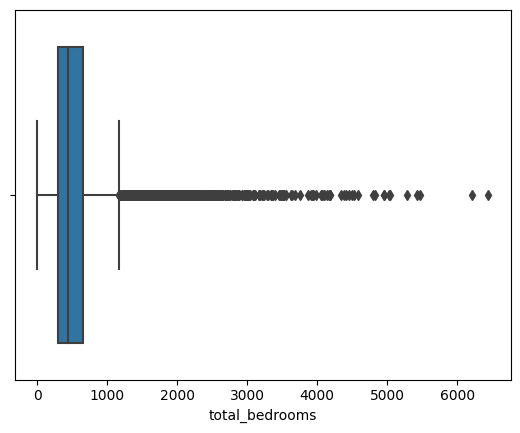

In [11]:
sns.boxplot(x='total_bedrooms', data=df)

In [12]:
median_value = df['total_bedrooms'].median()
median_value

435.0

In [13]:
df['total_bedrooms'].fillna(median_value, inplace=True)

In [14]:
df['total_bedrooms'].isna().sum()

0

<Axes: >

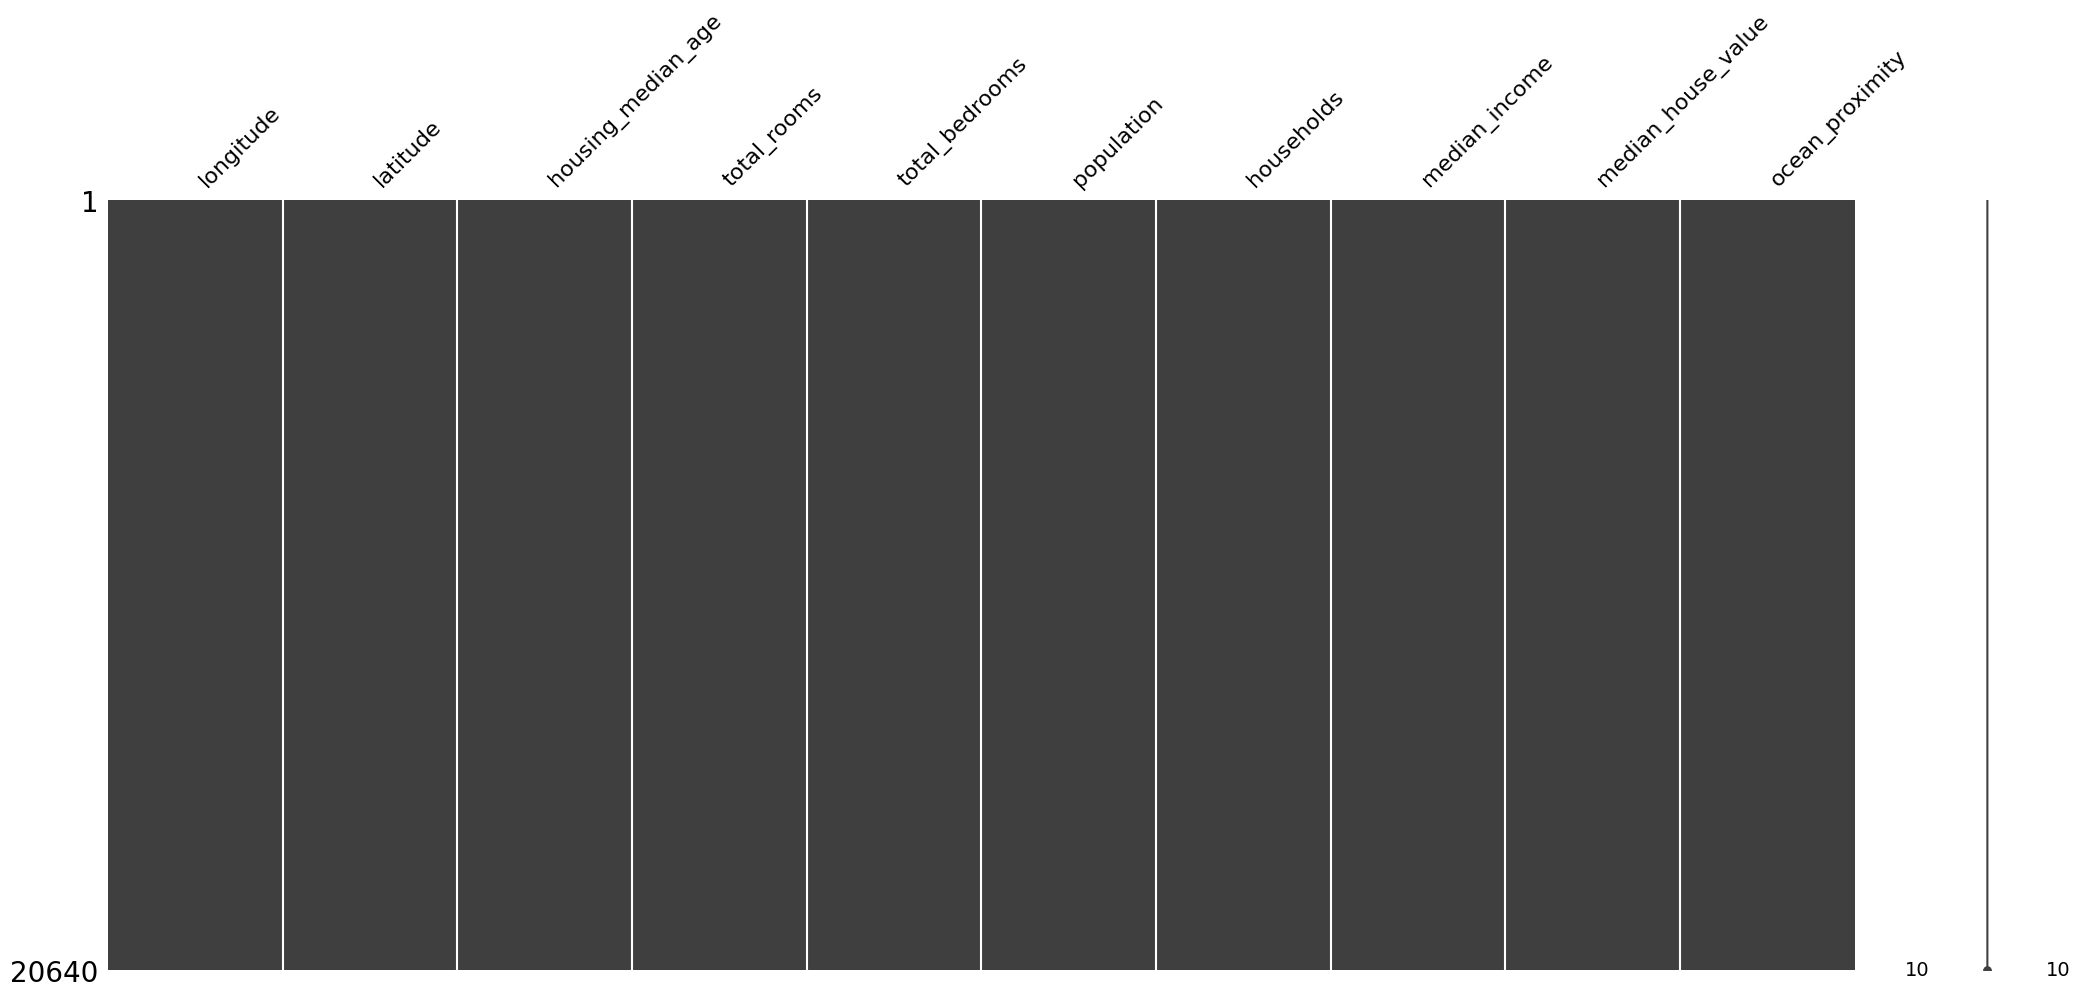

In [15]:
# visual representation of missing values
import missingno
missingno.matrix(df)

###### 2.3 checking five number summery

In [16]:
df.describe()

longitude      latitude  housing_median_age   total_rooms   
count  20640.000000  20640.000000        20640.000000  20640.000000  \
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income   
count    20640.000000  20640.000000  20640.000000   20640.000000  \
mean       536.838857   1425.476744    499.539680       3.870671   
std        419.391878   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        643.250000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

###### 2.4 checking unique/ nonunique  values

In [17]:
for column_name in df.columns:
    print("Column Name             :", column_name)
    
    column_name = df[column_name]
    print('Number of unique values :', column_name.nunique())
    
    if column_name.nunique() <= 6 :
        print('unique values       :', column_name.unique())
        print('unique value counts :', column_name.value_counts())
    print('*'*50)

Column Name             : longitude
Number of unique values : 844
**************************************************
Column Name             : latitude
Number of unique values : 862
**************************************************
Column Name             : housing_median_age
Number of unique values : 52
**************************************************
Column Name             : total_rooms
Number of unique values : 5926
**************************************************
Column Name             : total_bedrooms
Number of unique values : 1923
**************************************************
Column Name             : population
Number of unique values : 3888
**************************************************
Column Name             : households
Number of unique values : 1815
**************************************************
Column Name             : median_income
Number of unique values : 12928
**************************************************
Column Name             : median_house

In [18]:
# converting catagorical data into numerical data

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le

LabelEncoder()

In [19]:
# fit 
le.fit(df['ocean_proximity'])

LabelEncoder()

In [20]:
# fit transform
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

In [21]:
df['ocean_proximity'].sample(10)

6478     1
7209     0
15625    3
19407    1
9159     0
14407    4
1555     0
3783     0
12694    1
11310    0
Name: ocean_proximity, dtype: int32

In [22]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0        -122.23     37.88                41.0        880.0           129.0  \
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value   
0           322.0       126.0         8.3252            452600.0  \
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity  
0                    3  
1                    3  
2                    3  
3                    3  
4                    3  
...                ...  
20635                1  
20636                1  
20637                1  
20638                1  
20639                1  

[20640 rows x 10 columns]

### 3. EDA (Exploratory Data Analysis)

###### 3.1. Univariate Analysis

In [23]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

###### 3.1.1 By using boxplot

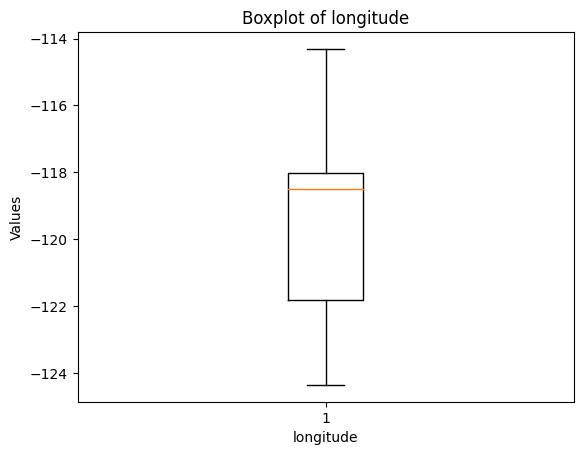

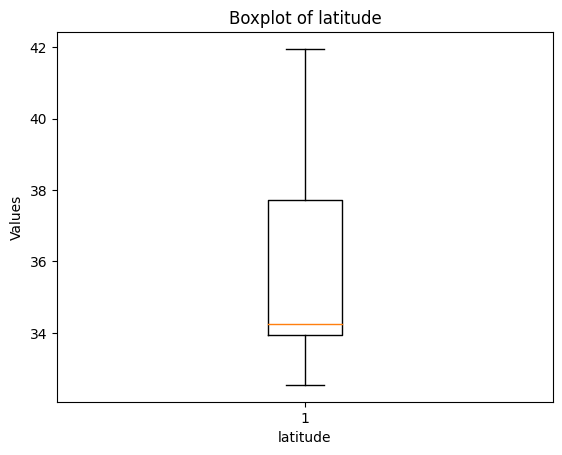

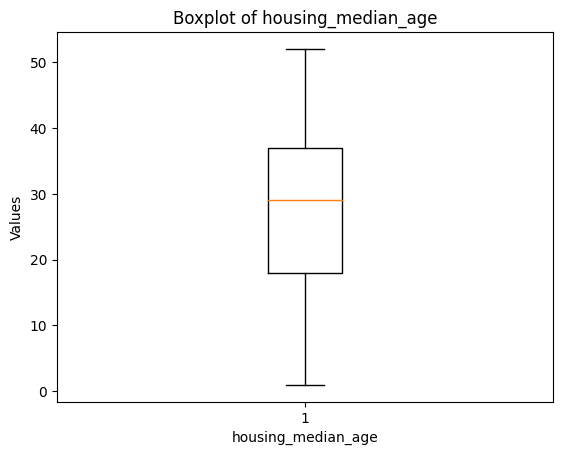

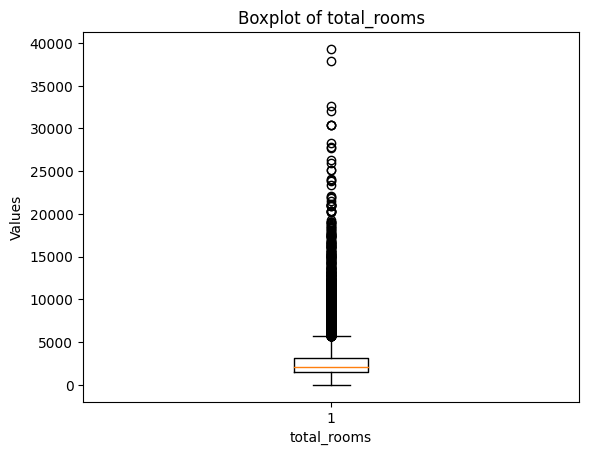

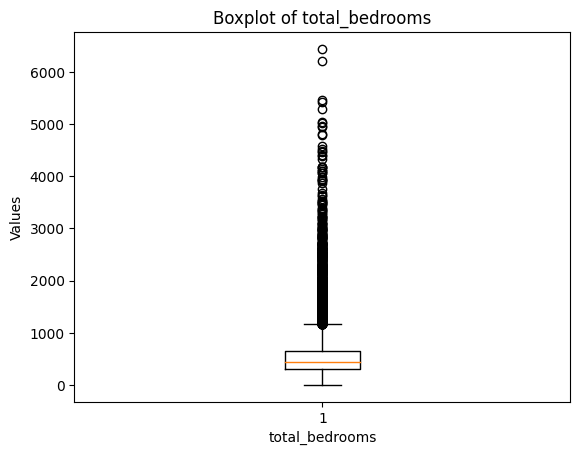

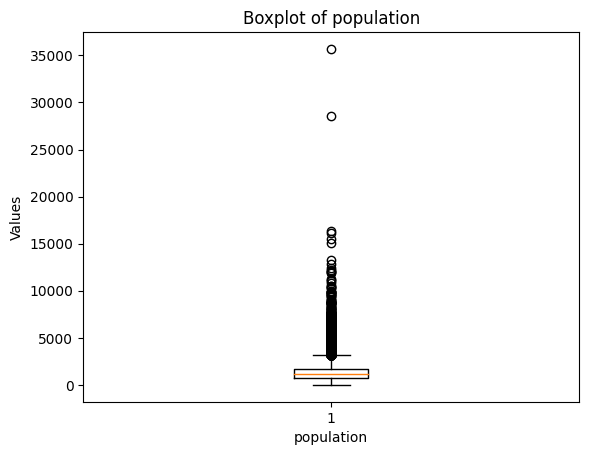

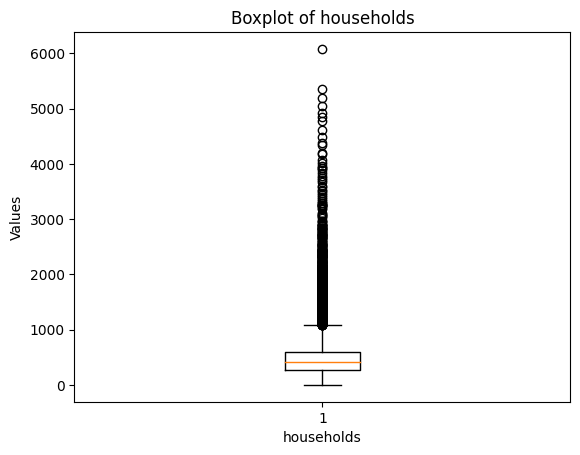

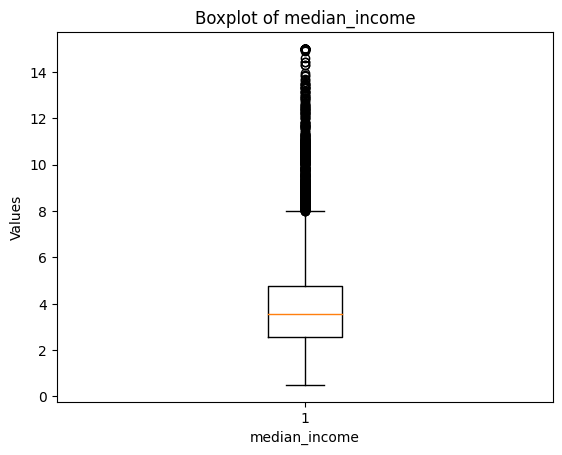

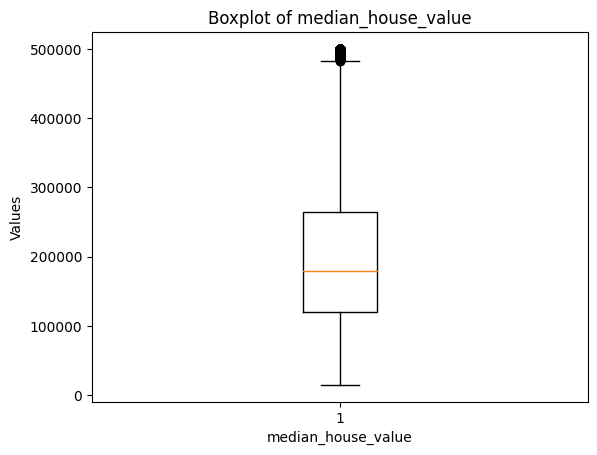

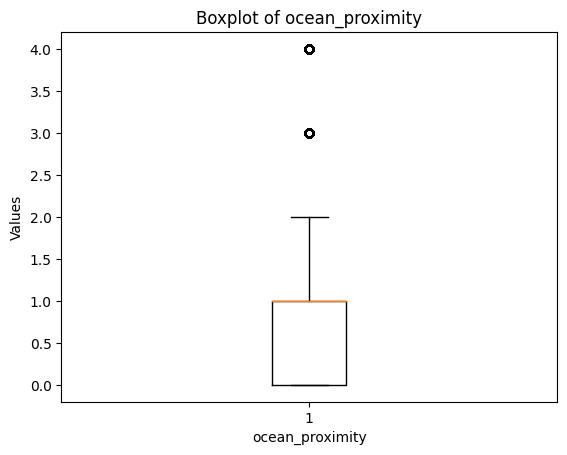

In [24]:
for column in df.columns:
    plt.figure()  # Create a new figure for each boxplot
    plt.boxplot(df[column])
    plt.title('Boxplot of {}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Values')
    
# Display the boxplots
plt.show()

In [25]:
median_1 = df['total_rooms'].median()
print('Median of total_rooms :', median_1)

median_2 = df['total_bedrooms'].median()
print('Median of total_bedrooms :', median_2)

median_3 = df['population'].median()
print('Median of population :', median_3)

median_4 = df['households'].median()
print('Median of households :', median_4)

median_5 = df['median_income'].median()
print('Median of median_income :', median_5)

median_6 = df['median_house_value'].median()
print('Median of median_house_value :', median_6)

Median of total_rooms : 2127.0
Median of total_bedrooms : 435.0
Median of population : 1166.0
Median of households : 409.0
Median of median_income : 3.5347999999999997
Median of median_house_value : 179700.0


###### 3.1.2 By using histplot

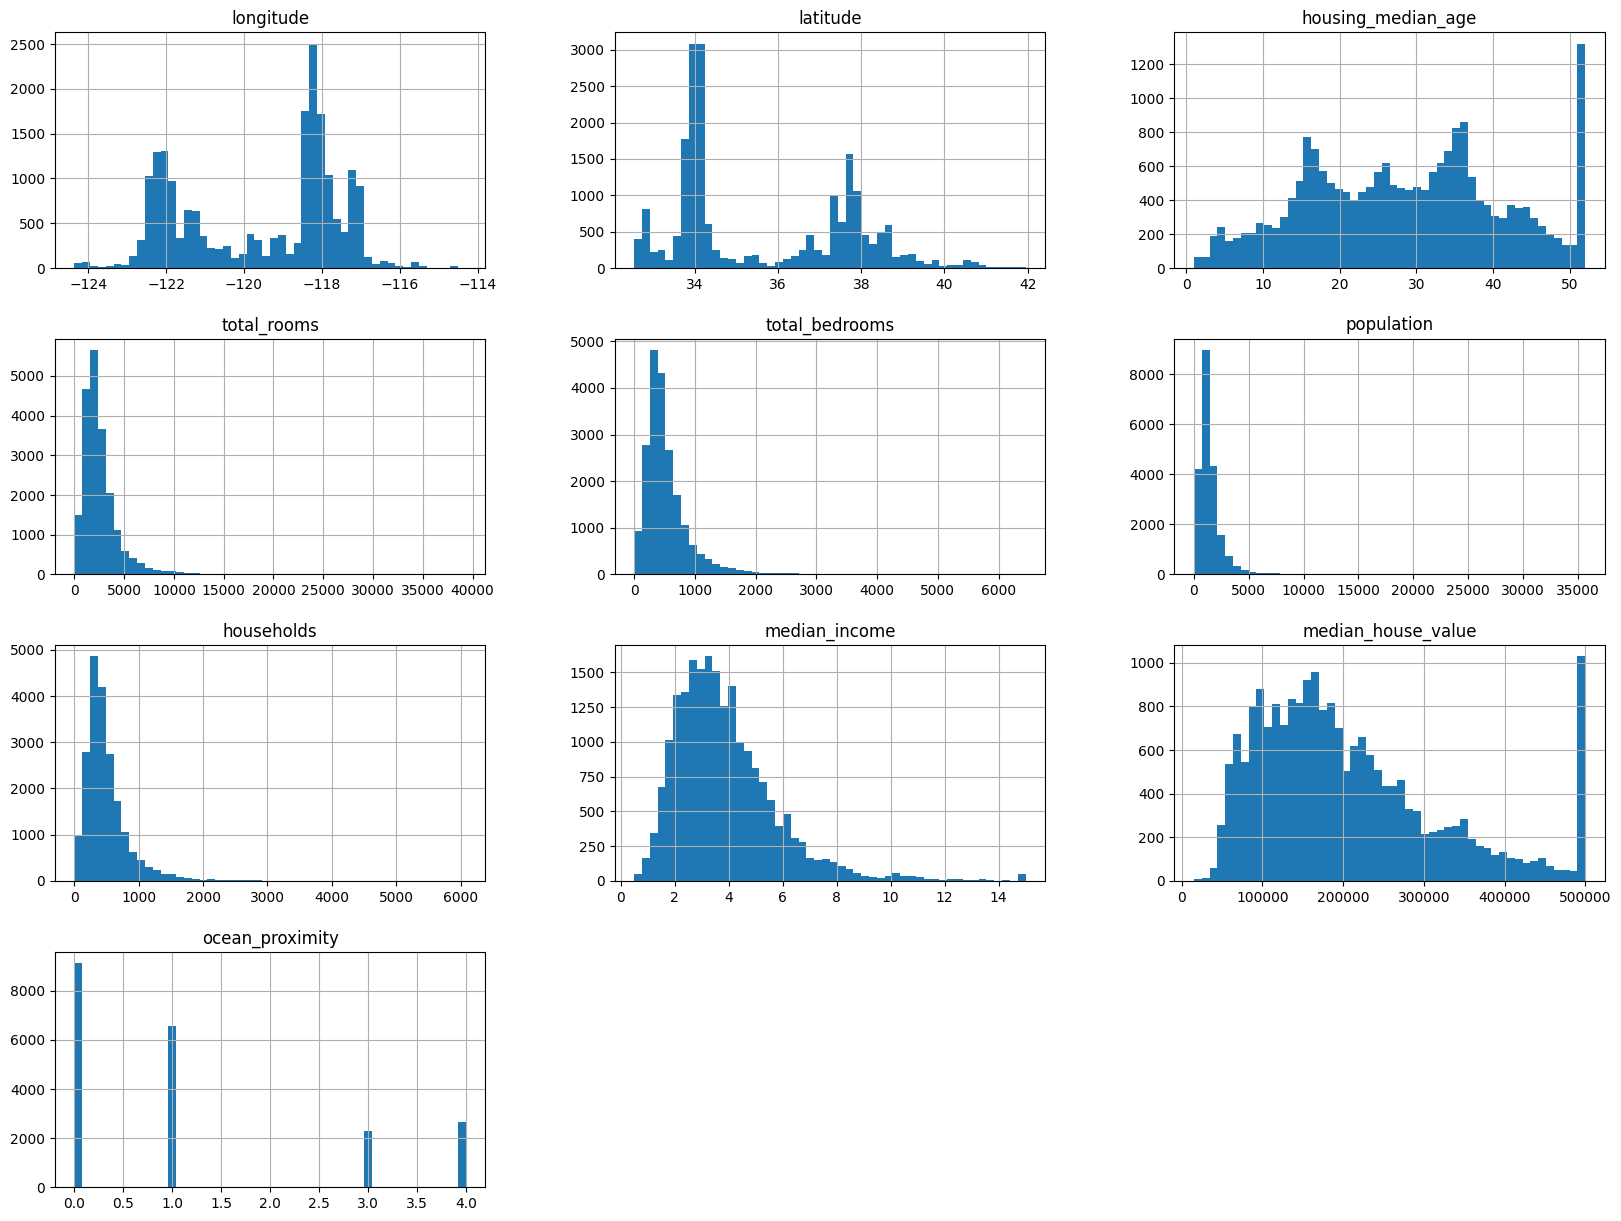

In [26]:
df.hist(bins=50,figsize=(20,15))
plt.show()

###### 3.1.3 by using distplot

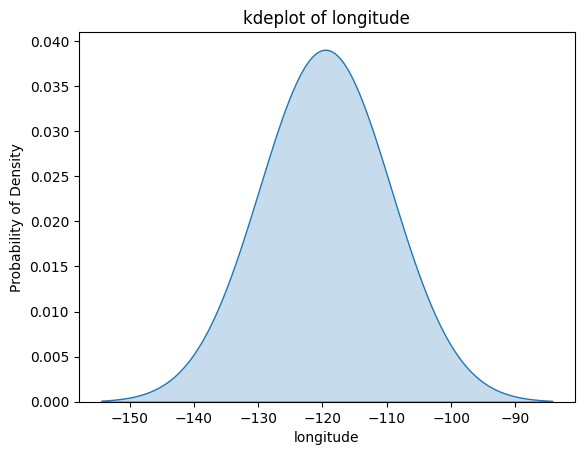

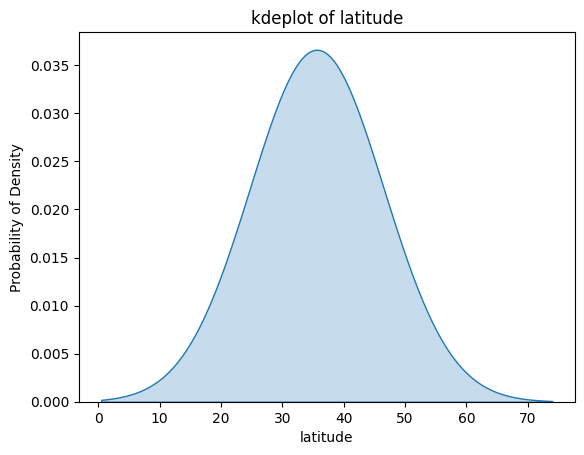

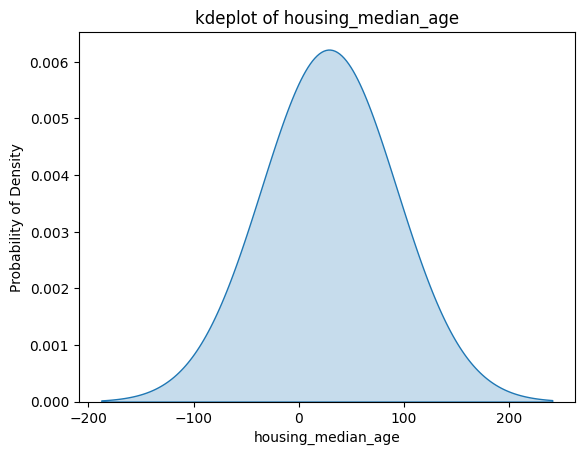

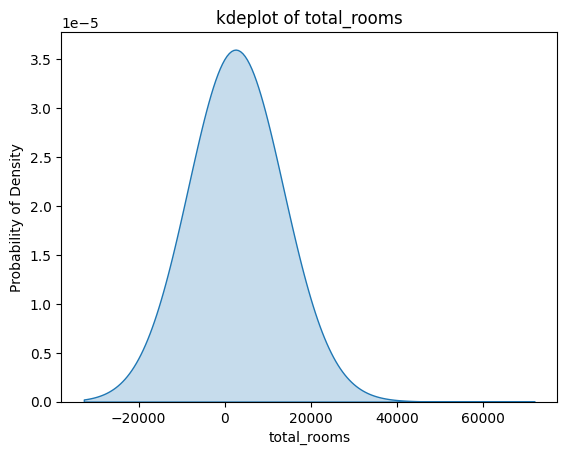

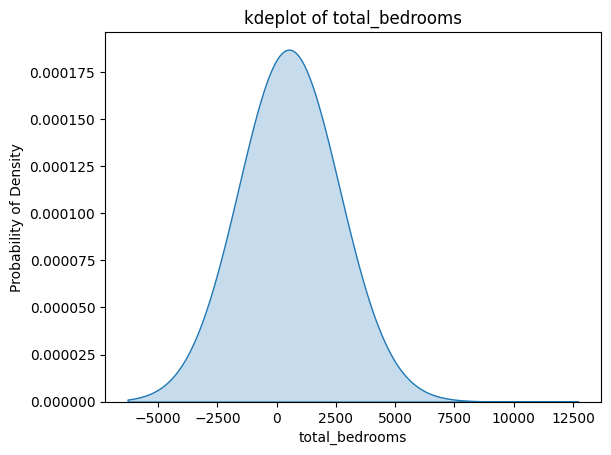

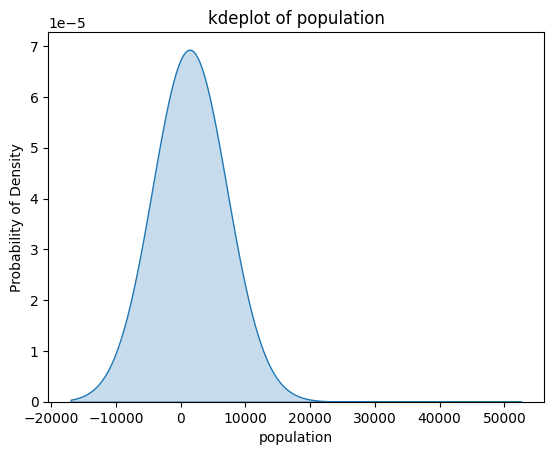

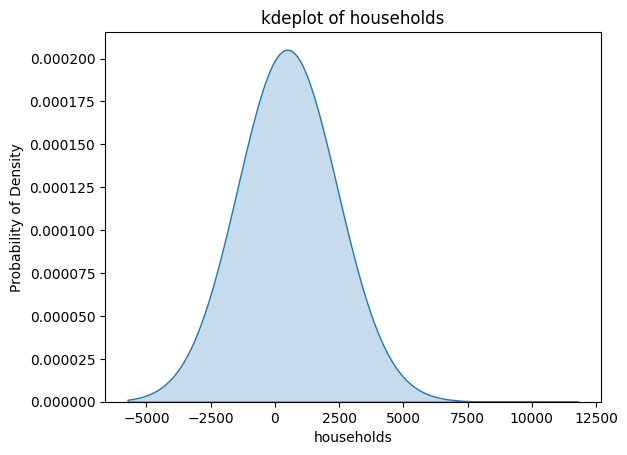

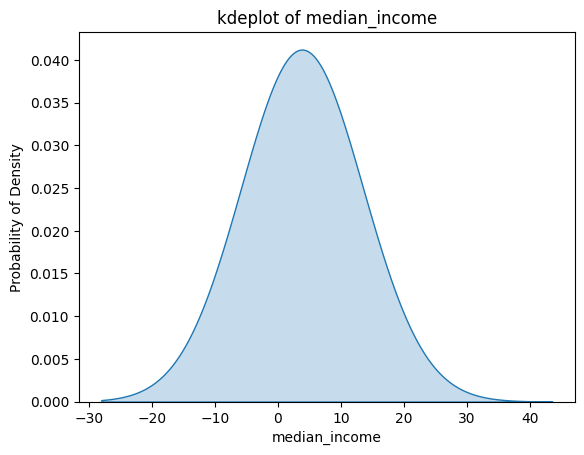

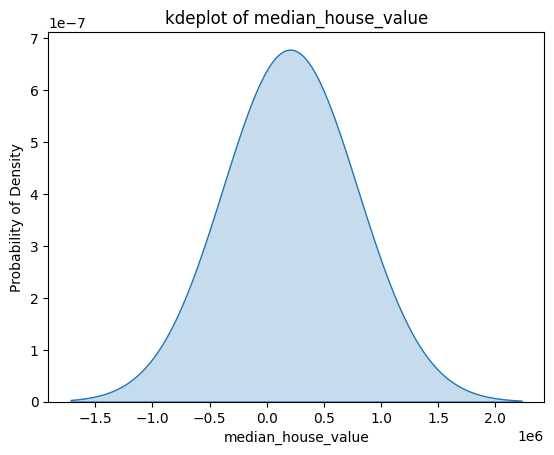

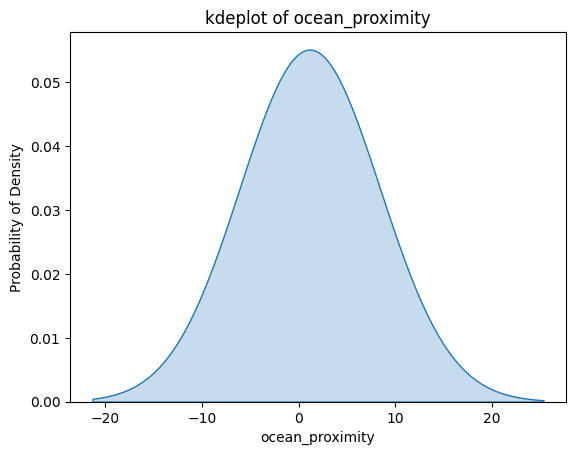

In [27]:
for column in df.columns:
    plt.figure()  # Create a new figure for each boxplot
    sns.kdeplot(df[column], fill=True, bw_method=5)
    plt.title('kdeplot of {}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Probability of Density')
    
# Display the kdeplot
plt.show()

###### Catagorical variable from dataset

In [28]:
df['ocean_proximity'].value_counts()

ocean_proximity
0    9136
1    6551
4    2658
3    2290
2       5
Name: count, dtype: int64

<Axes: ylabel='count'>

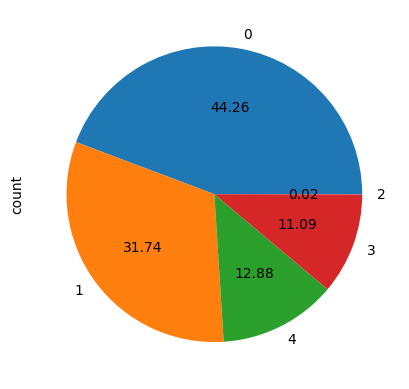

In [29]:
df['ocean_proximity'].value_counts().plot(kind='pie',autopct='%.2f')

###### 3.2 Bivariate analysis

In [30]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [42]:
corr['median_house_value'].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049457
households            0.065843
ocean_proximity       0.081750
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

###### 3.2.1 By using correlation of coefficient

In [31]:
columns = df.columns

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        var1 = columns[i]
        var2 = columns[j]

        correlation_coefficient = df[var1].corr(df[var2])

        print("Bivariate Analysis: {} and {}: Correlation Coefficient = {:.2f}".format(var1, var2, correlation_coefficient))

Bivariate Analysis: longitude and latitude: Correlation Coefficient = -0.92
Bivariate Analysis: longitude and housing_median_age: Correlation Coefficient = -0.11
Bivariate Analysis: longitude and total_rooms: Correlation Coefficient = 0.04
Bivariate Analysis: longitude and total_bedrooms: Correlation Coefficient = 0.07
Bivariate Analysis: longitude and population: Correlation Coefficient = 0.10
Bivariate Analysis: longitude and households: Correlation Coefficient = 0.06
Bivariate Analysis: longitude and median_income: Correlation Coefficient = -0.02
Bivariate Analysis: longitude and median_house_value: Correlation Coefficient = -0.05
Bivariate Analysis: longitude and ocean_proximity: Correlation Coefficient = -0.29
Bivariate Analysis: latitude and housing_median_age: Correlation Coefficient = 0.01
Bivariate Analysis: latitude and total_rooms: Correlation Coefficient = -0.04
Bivariate Analysis: latitude and total_bedrooms: Correlation Coefficient = -0.07
Bivariate Analysis: latitude and

###### 3.2.2 By using scatterplot

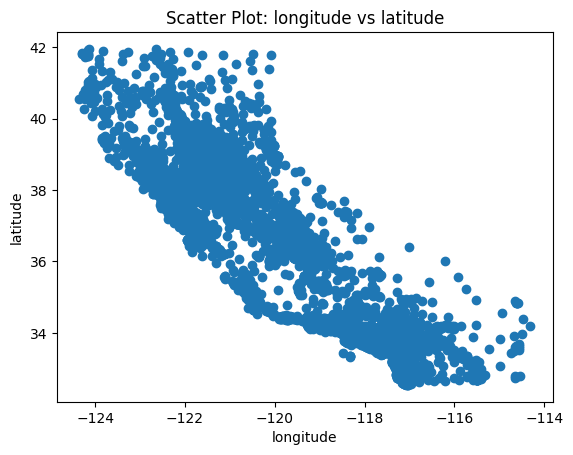

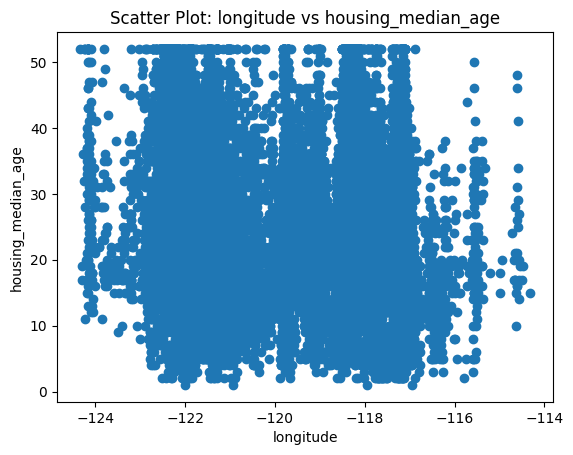

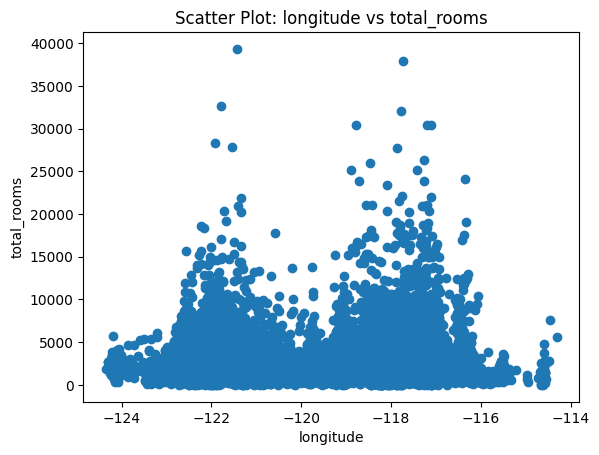

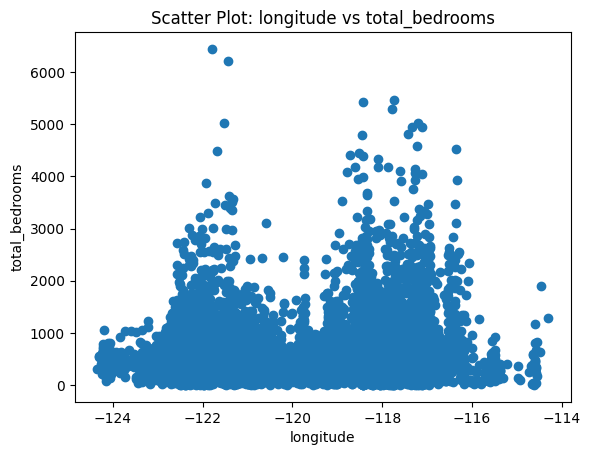

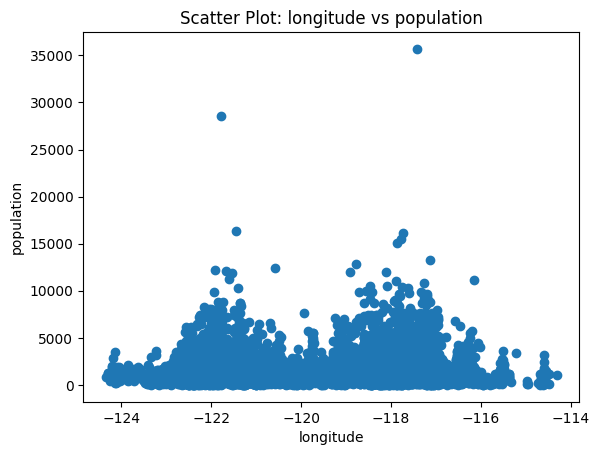

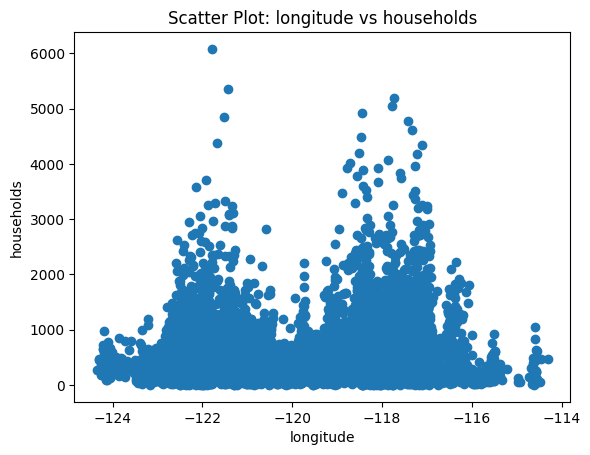

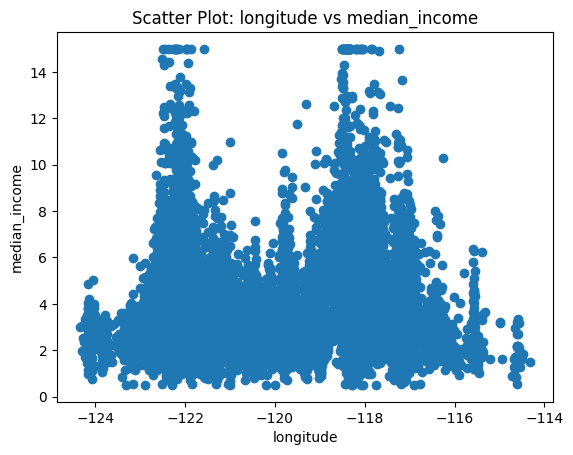

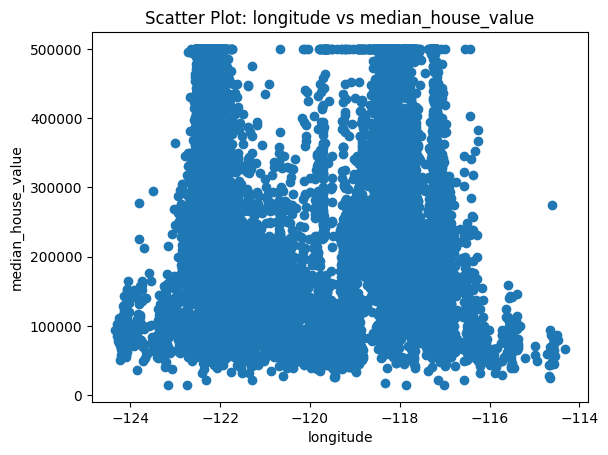

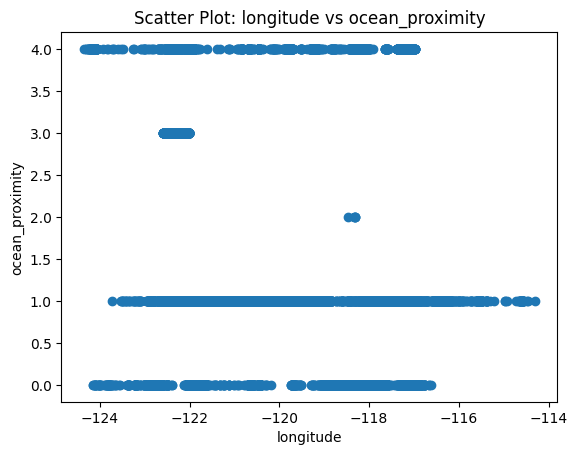

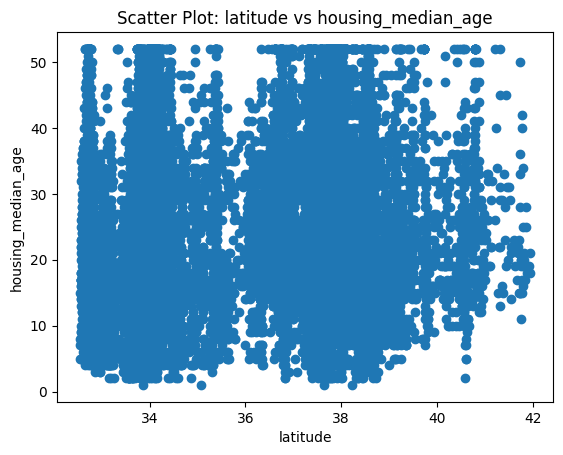

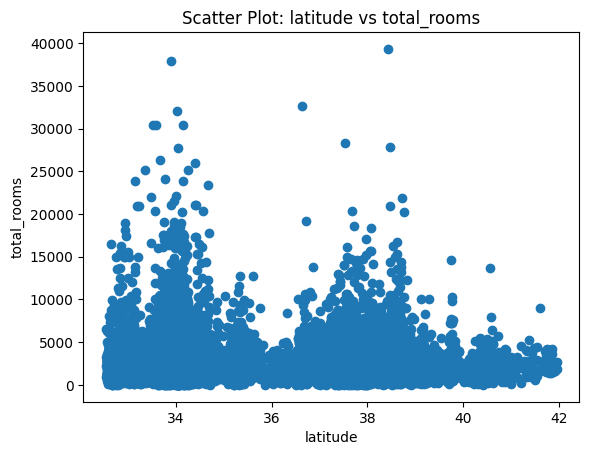

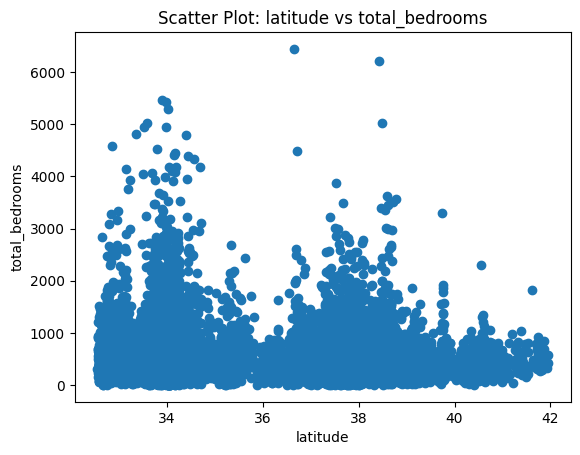

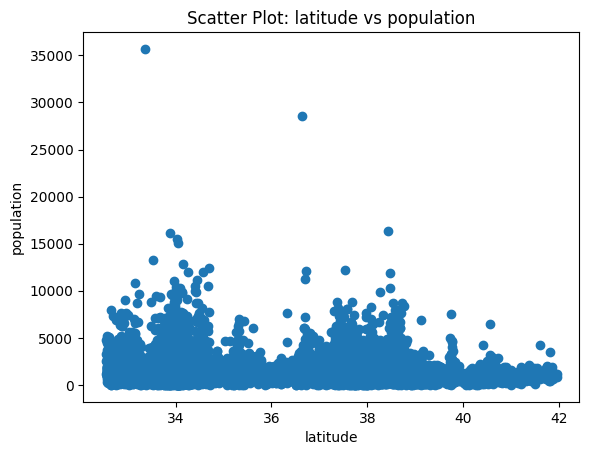

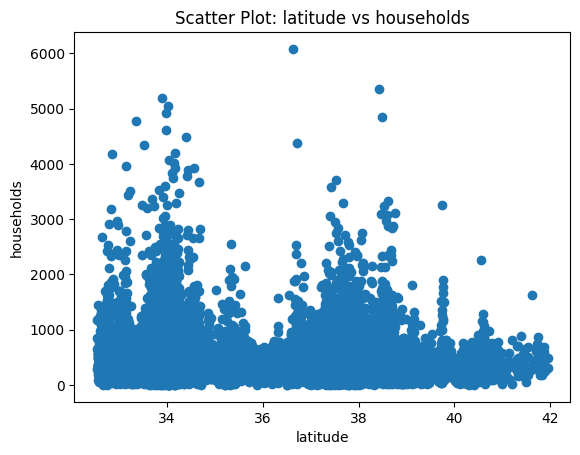

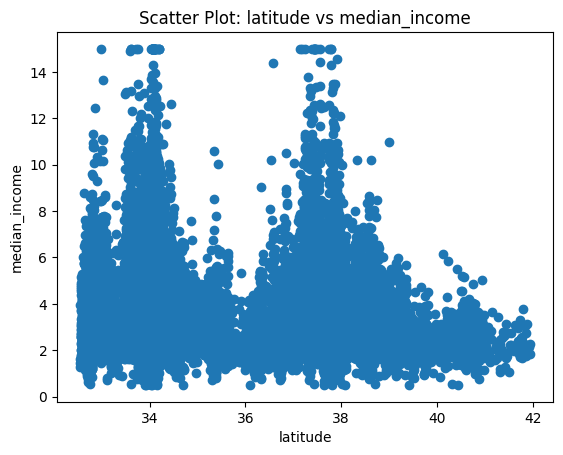

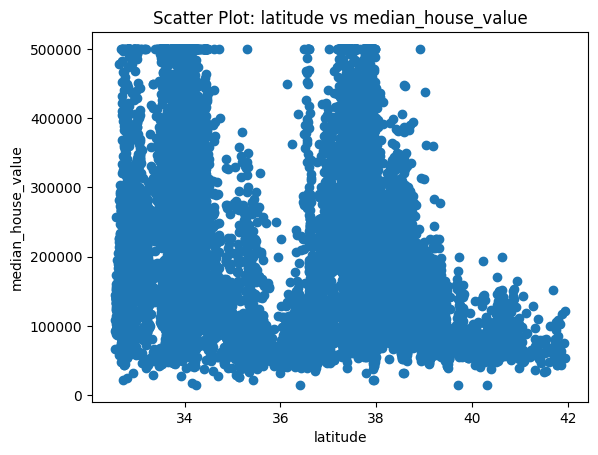

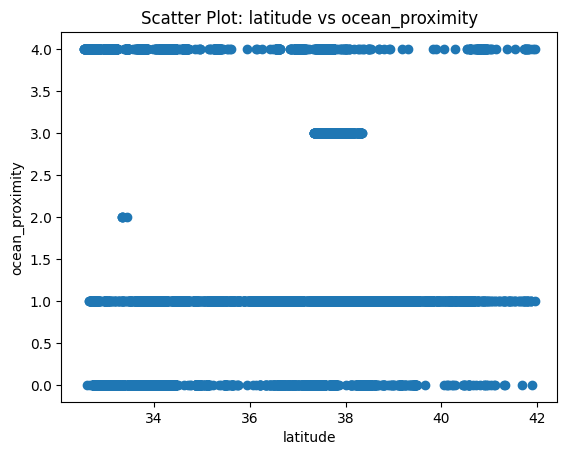

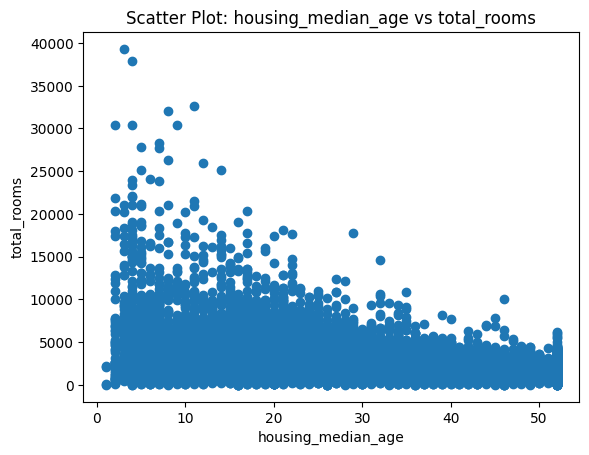

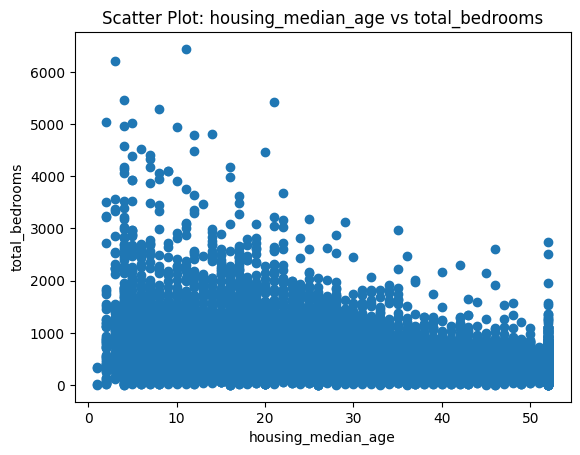

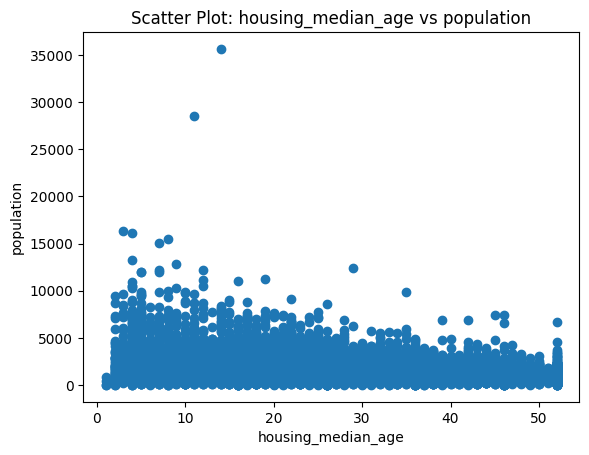

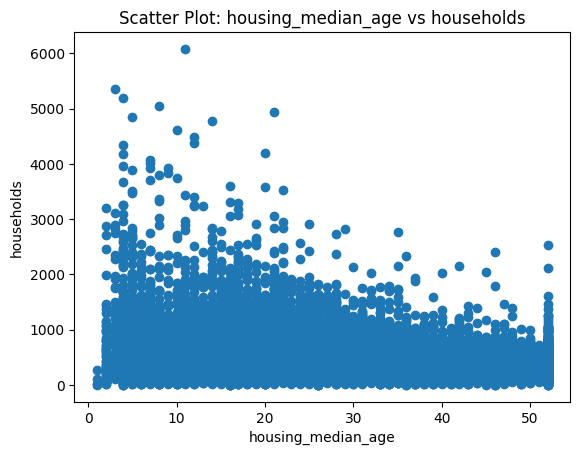

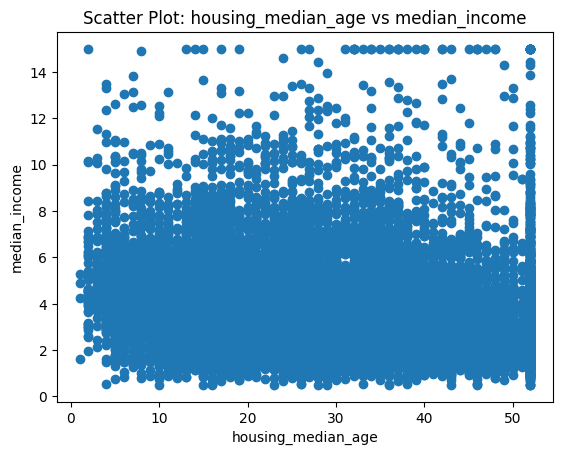

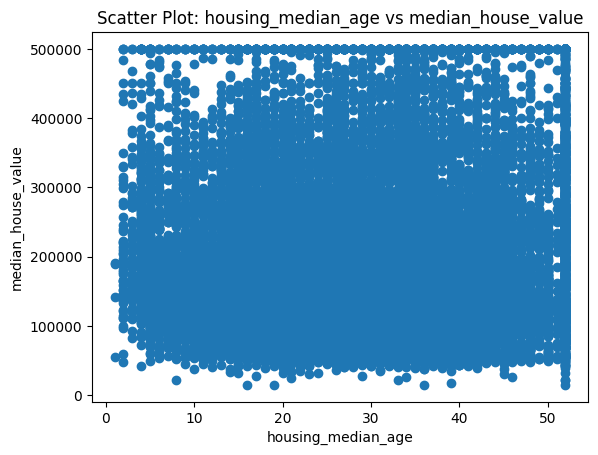

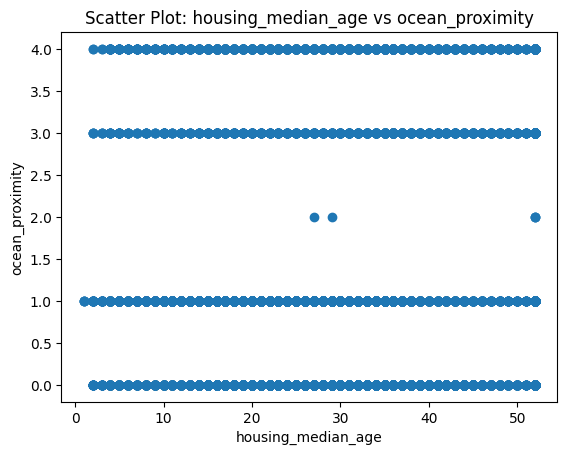

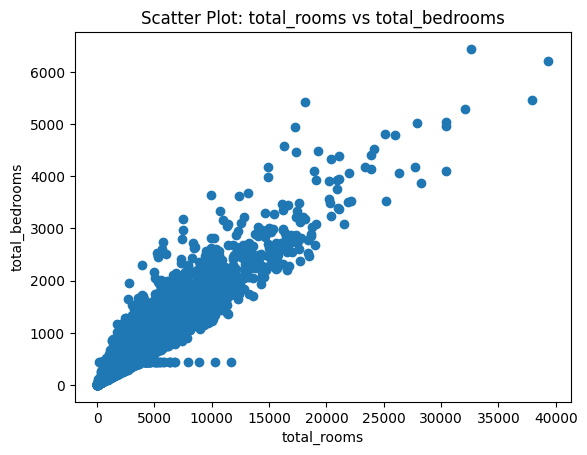

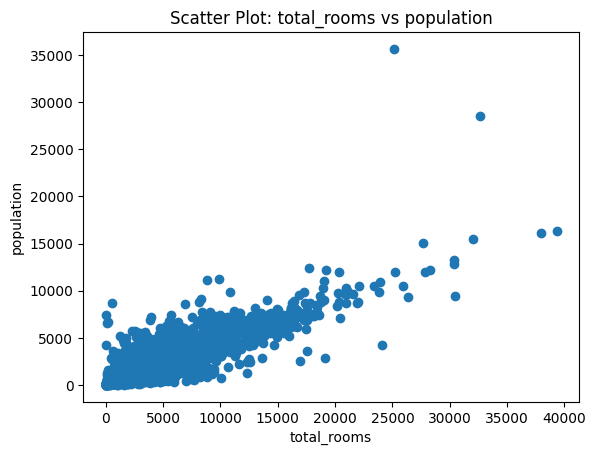

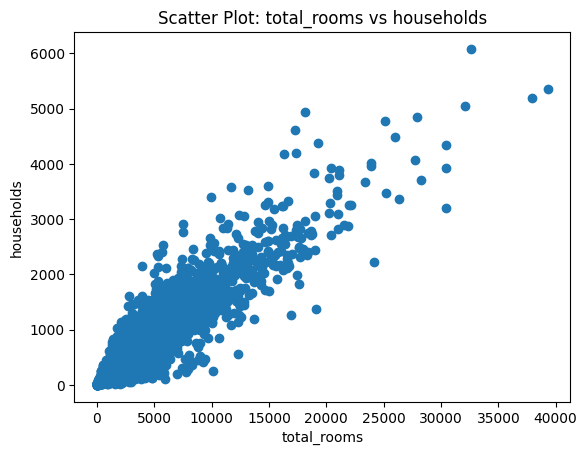

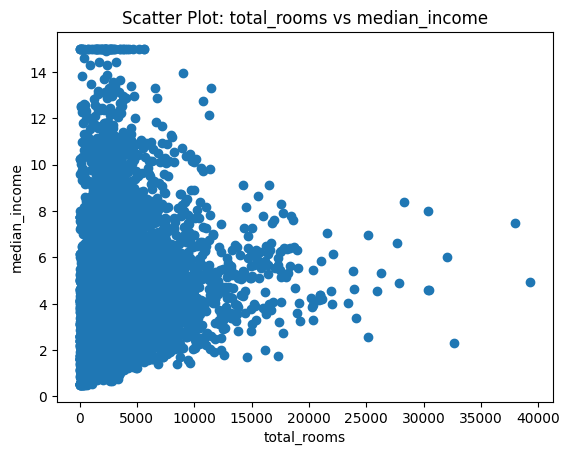

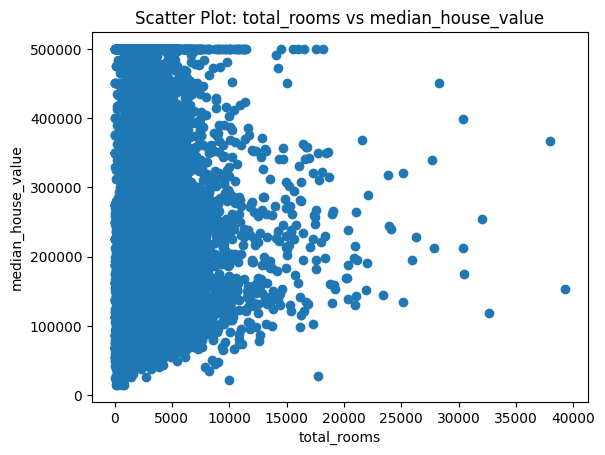

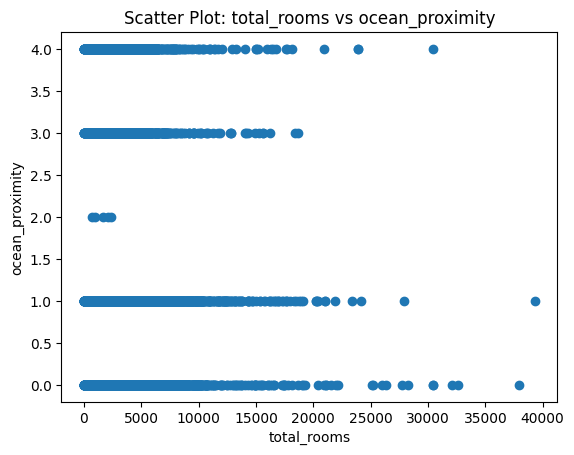

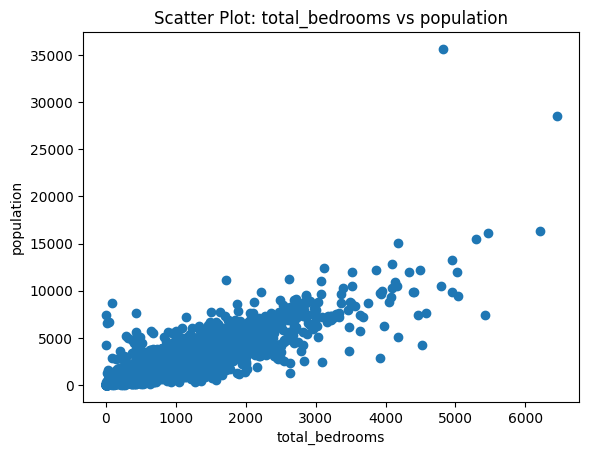

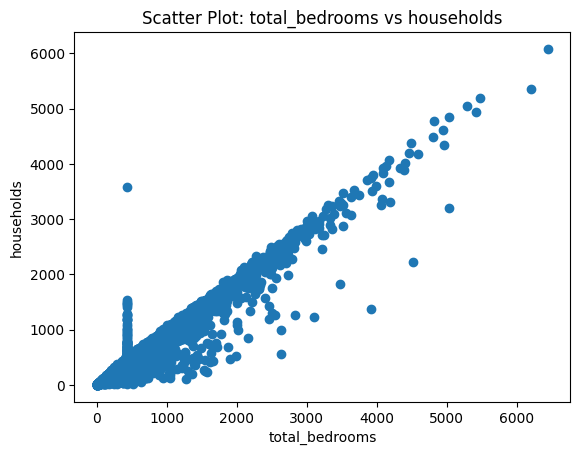

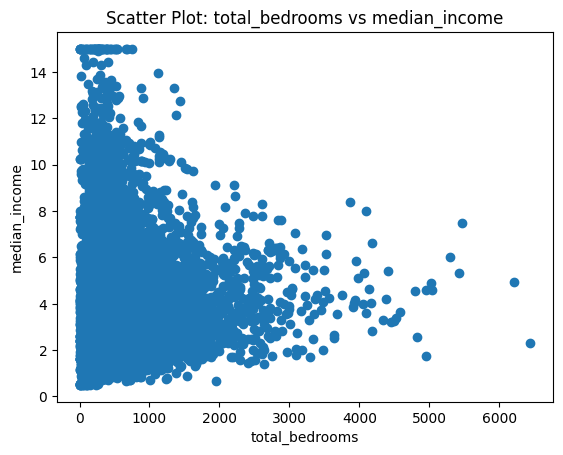

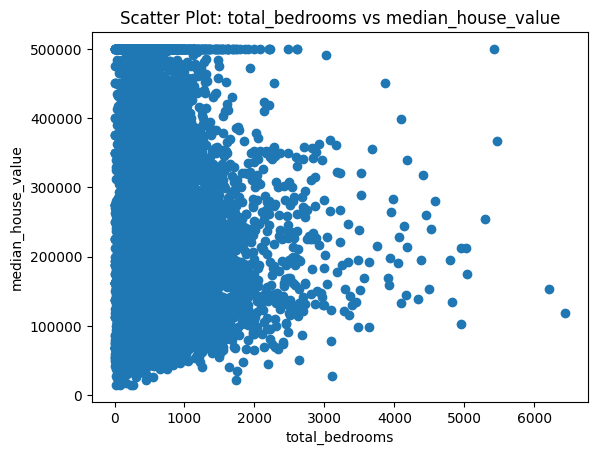

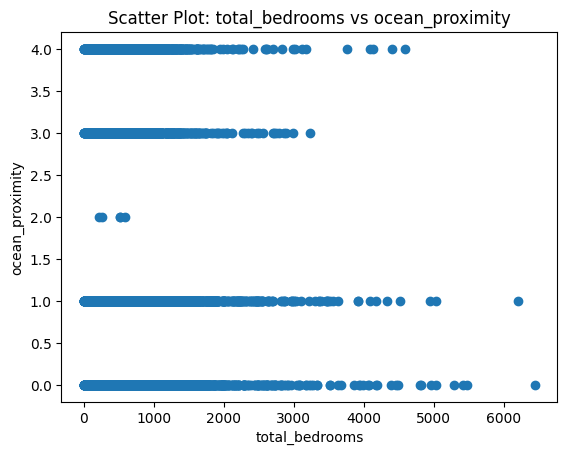

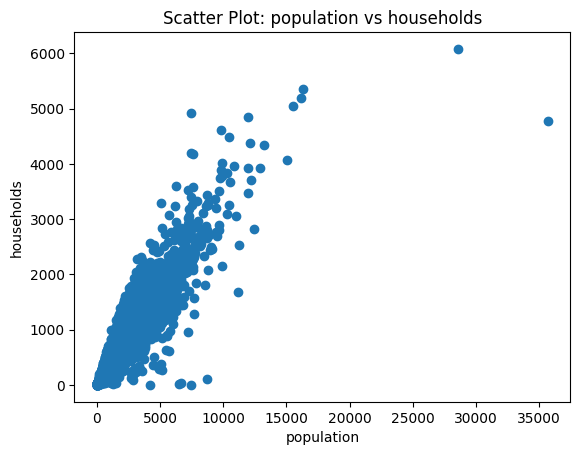

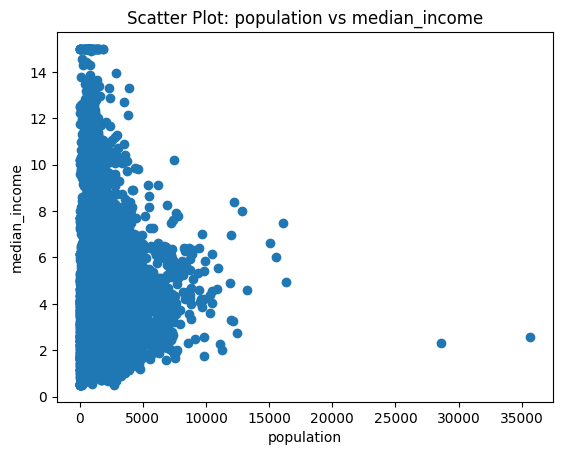

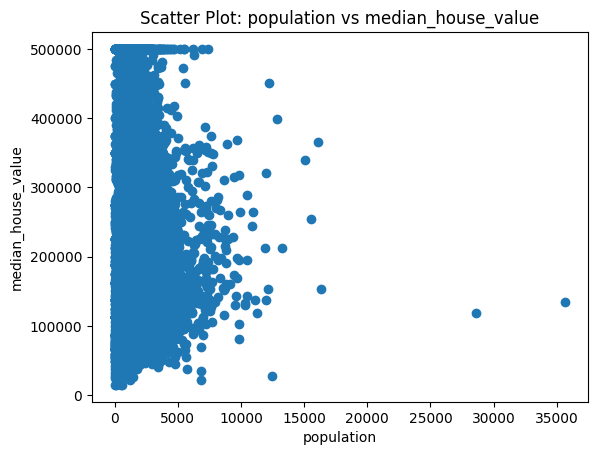

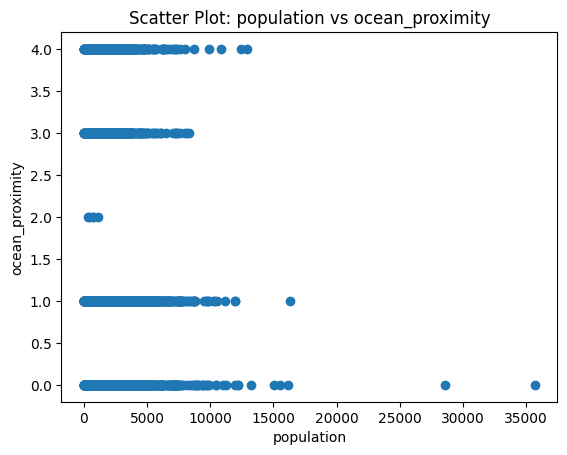

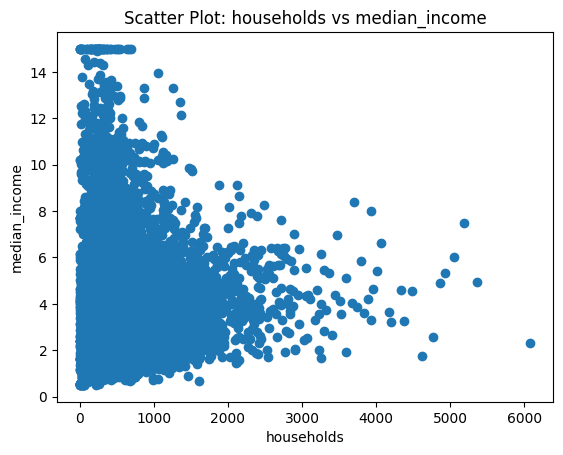

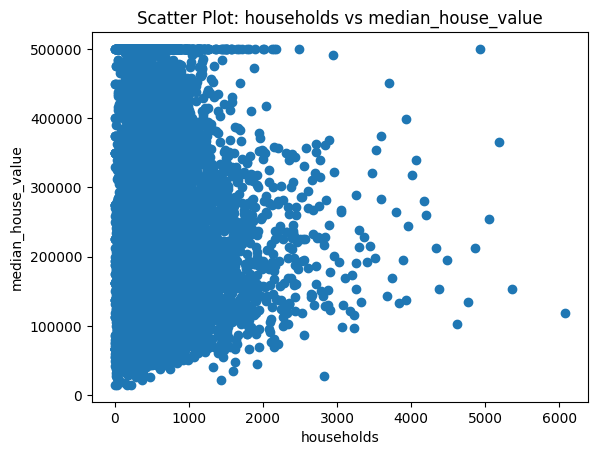

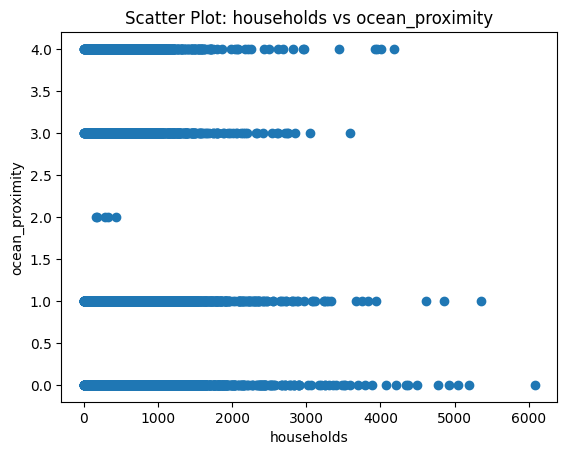

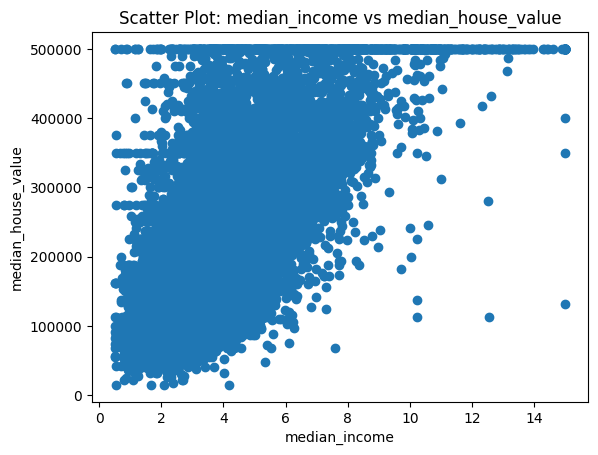

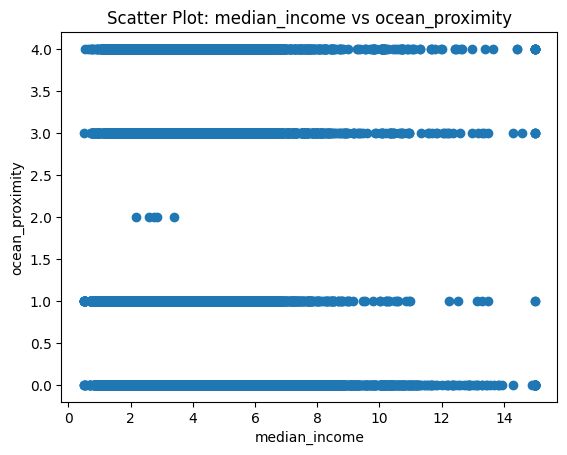

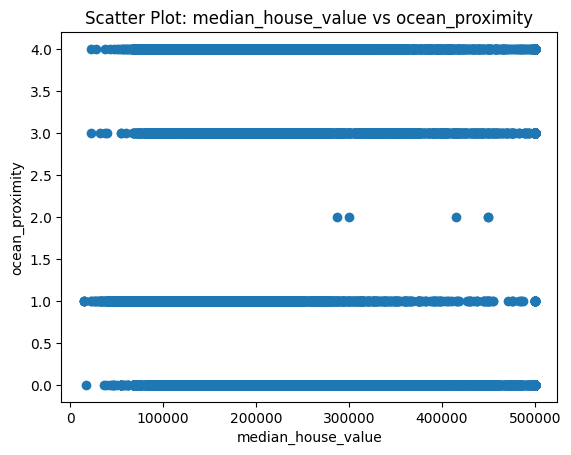

In [34]:
# Perform scatter plot using a for loop
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        var1 = columns[i]
        var2 = columns[j]

        # Create scatter plot for var1 and var2
        plt.scatter(df[var1], df[var2])
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.title("Scatter Plot: {} vs {}".format(var1, var2))
        plt.show()

###### 3.2.3 by using regression plot

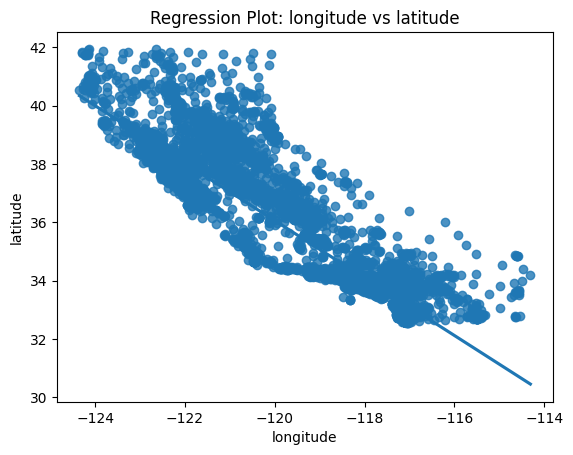

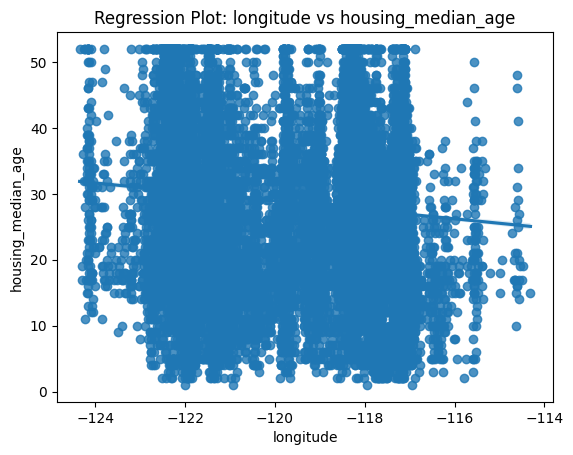

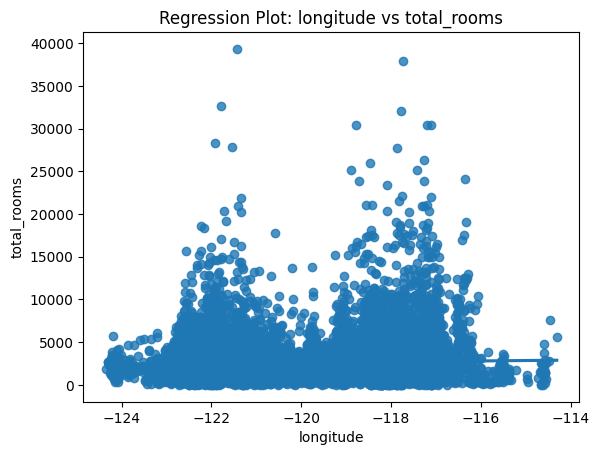

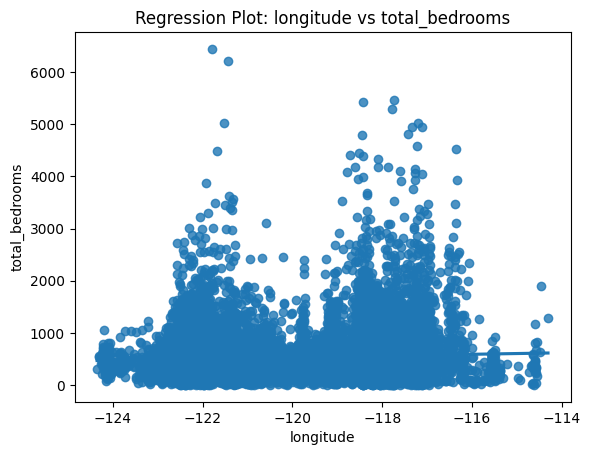

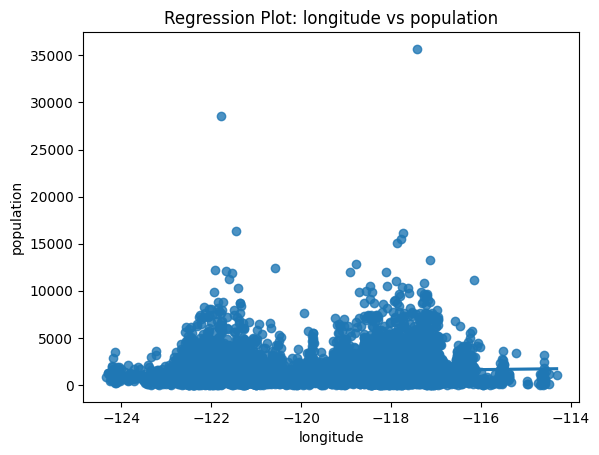

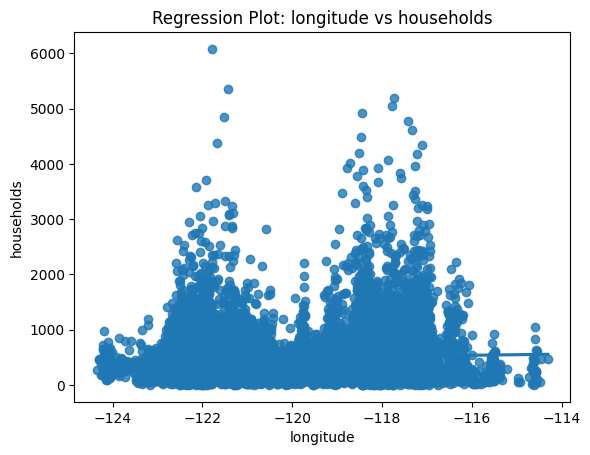

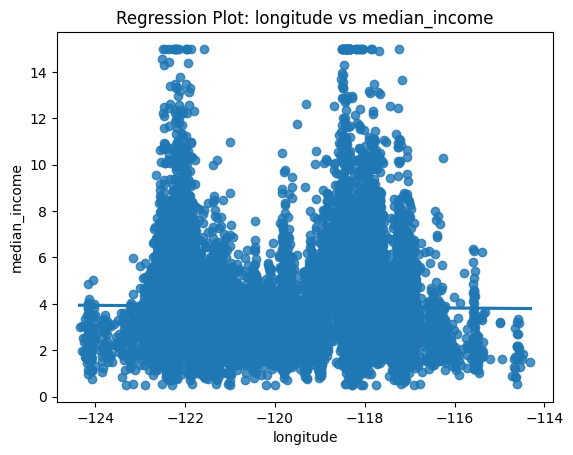

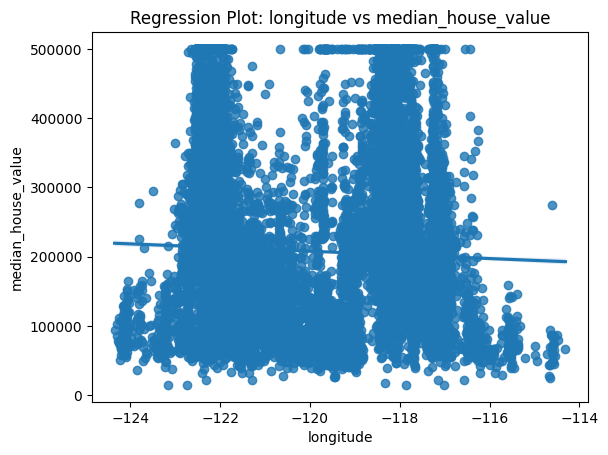

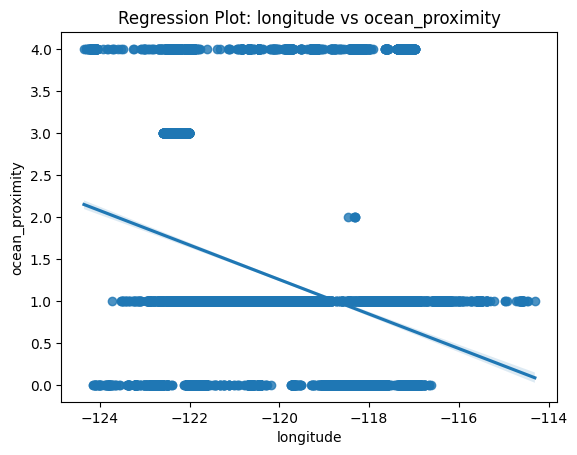

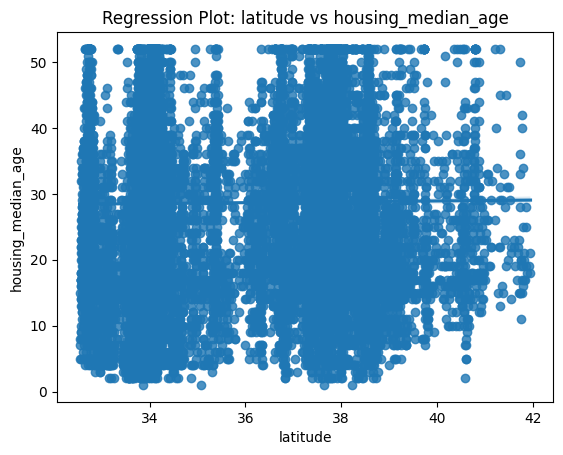

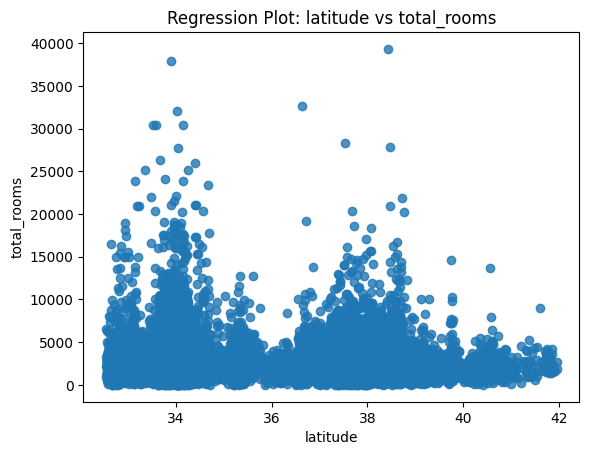

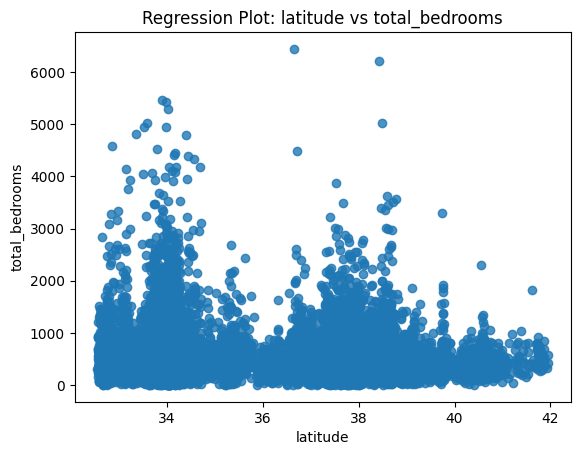

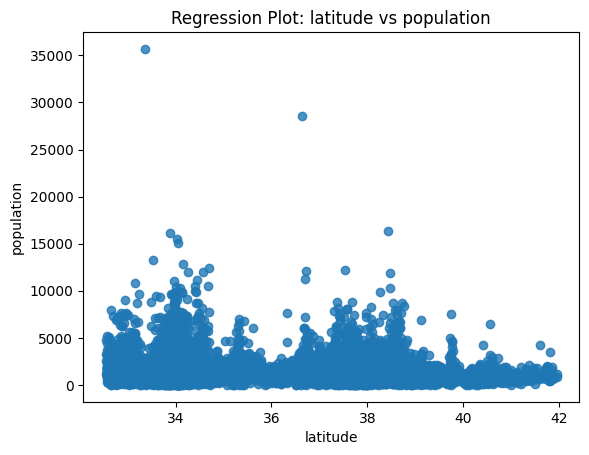

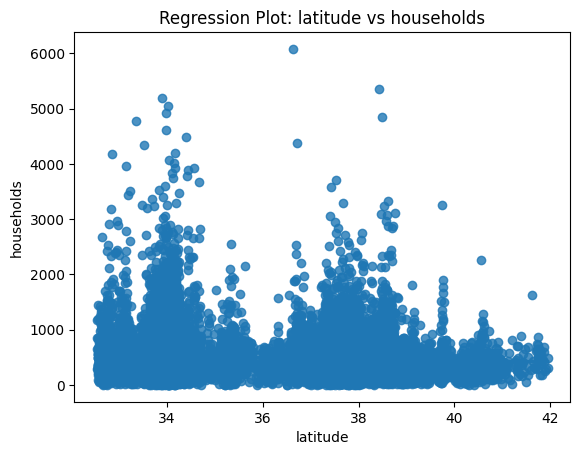

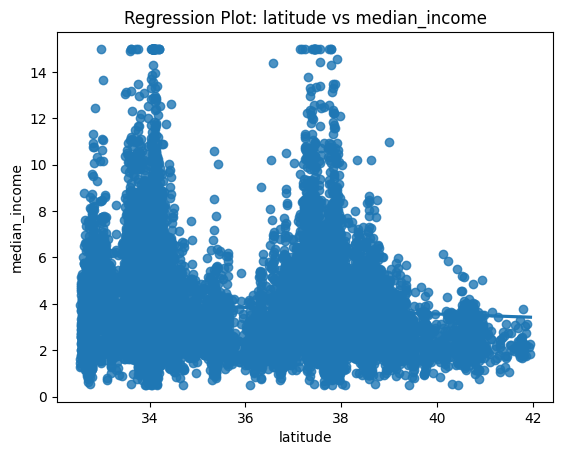

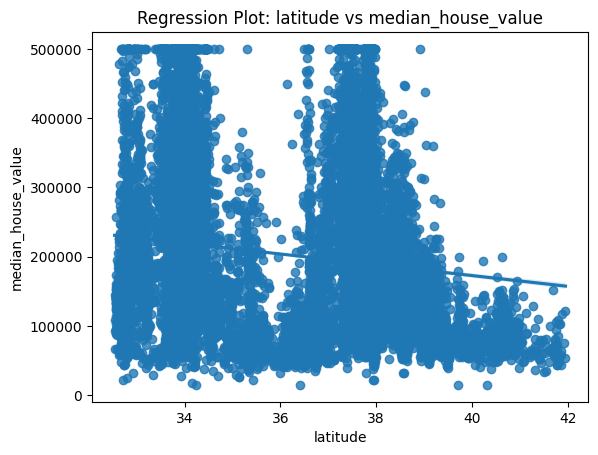

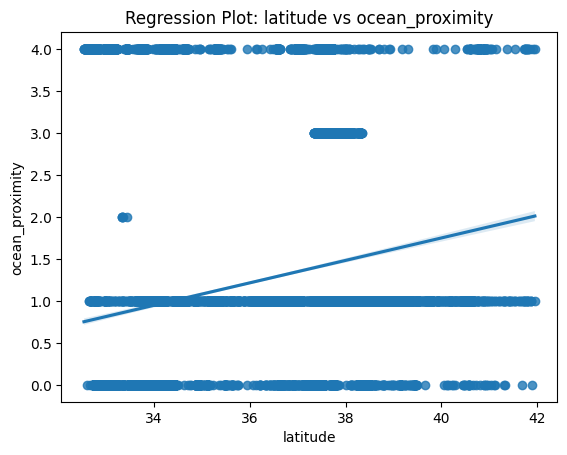

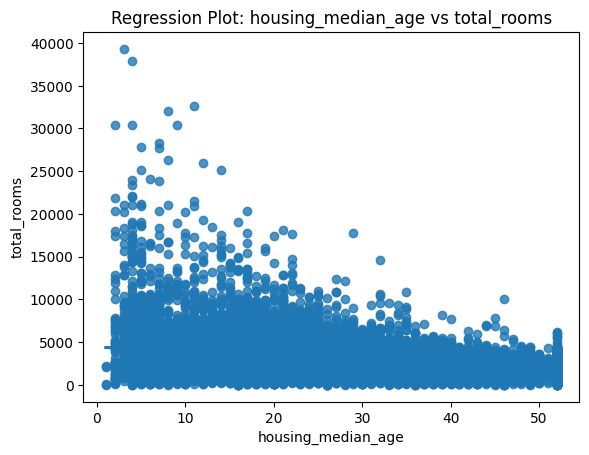

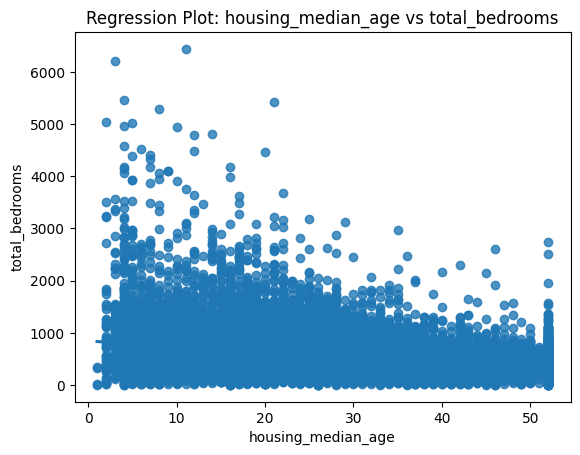

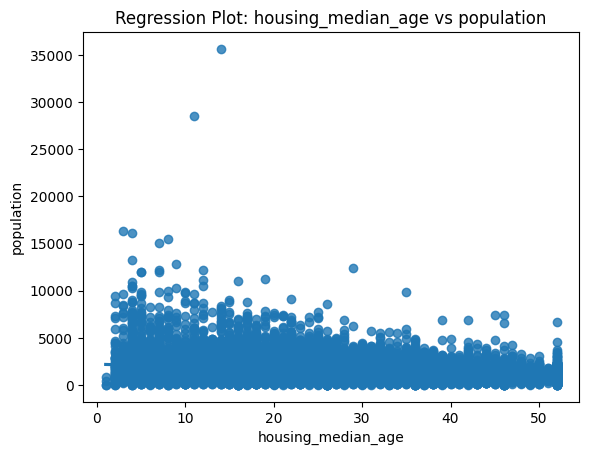

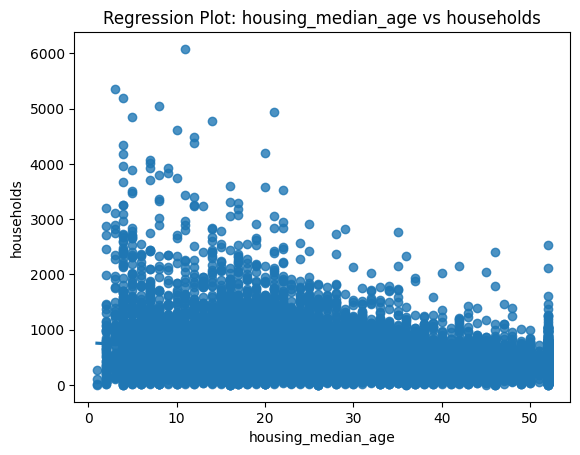

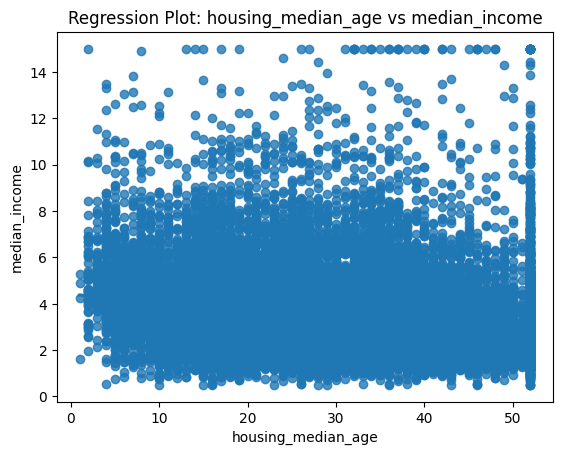

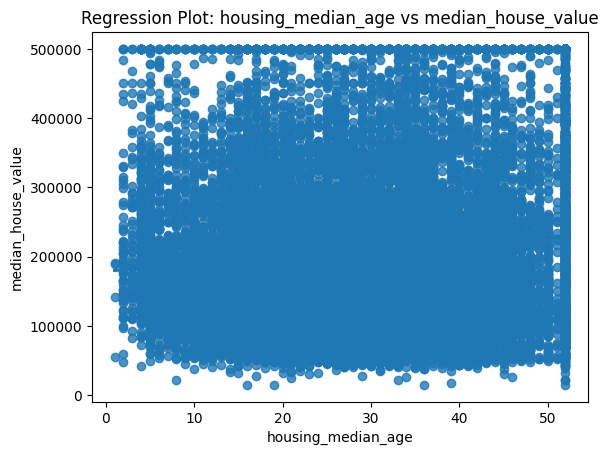

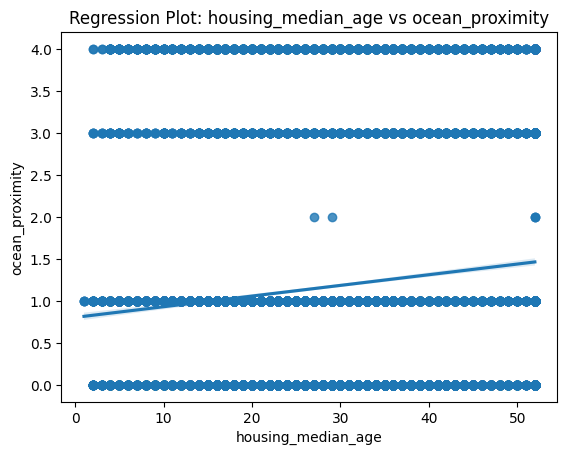

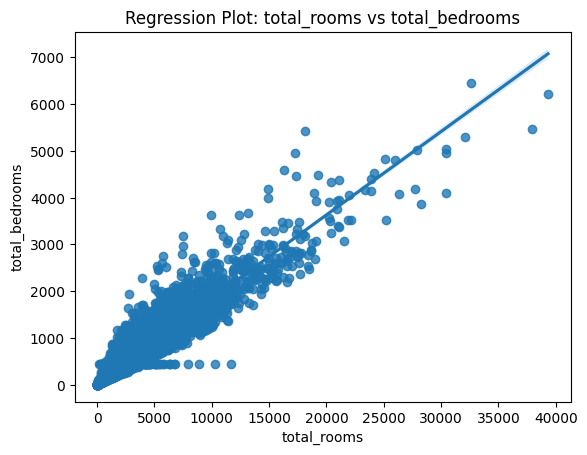

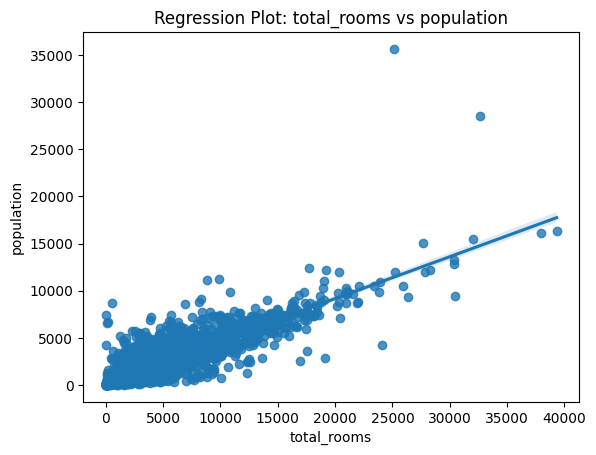

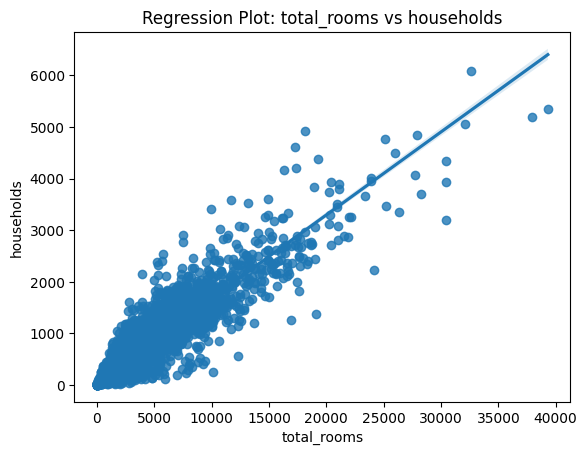

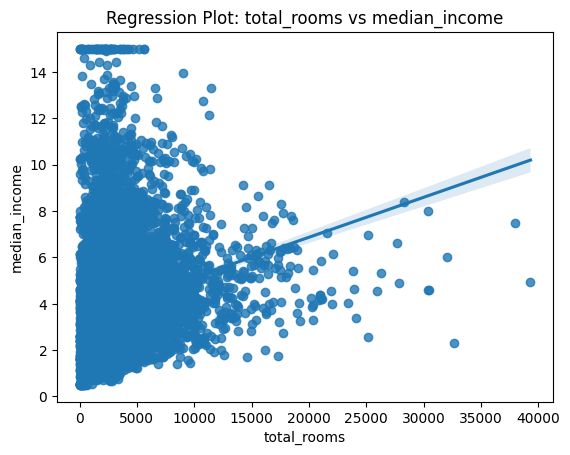

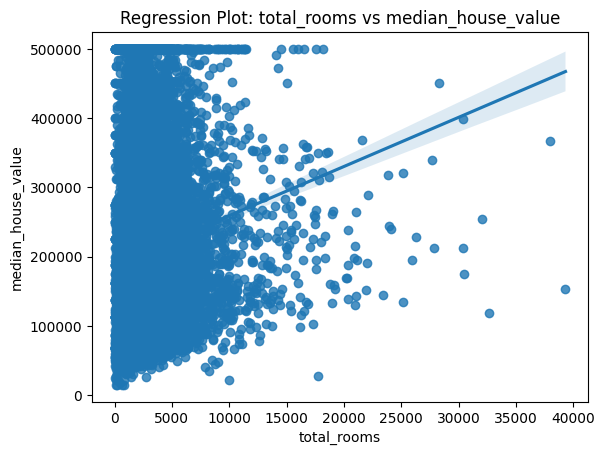

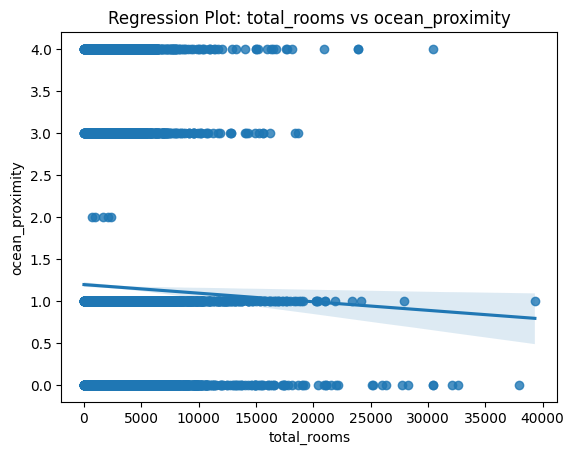

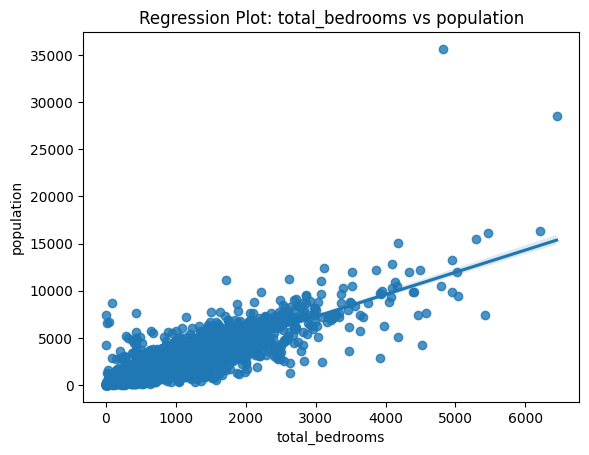

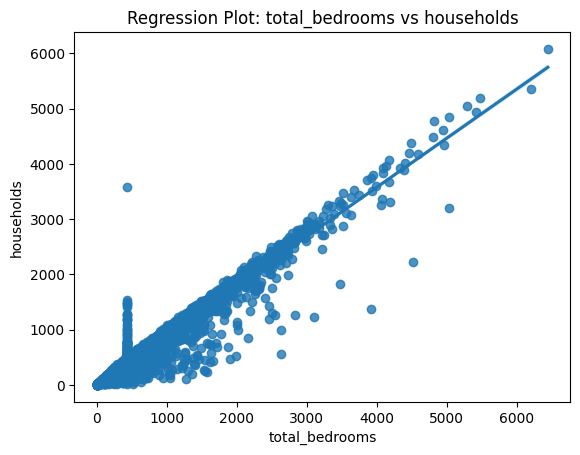

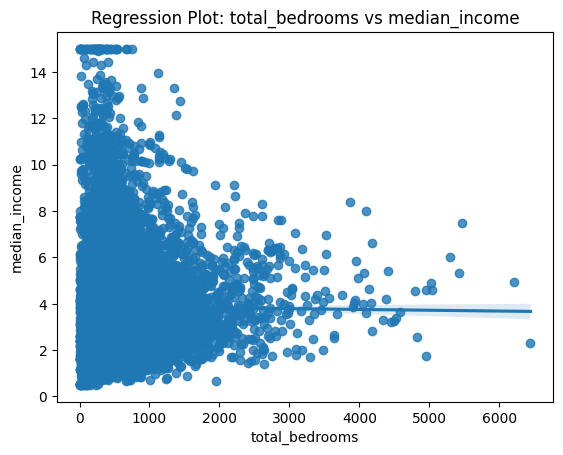

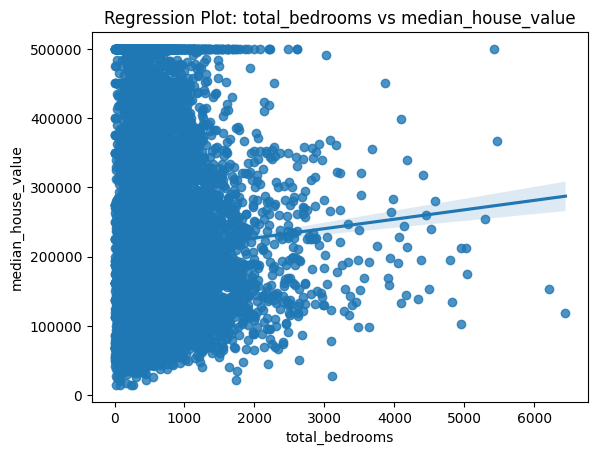

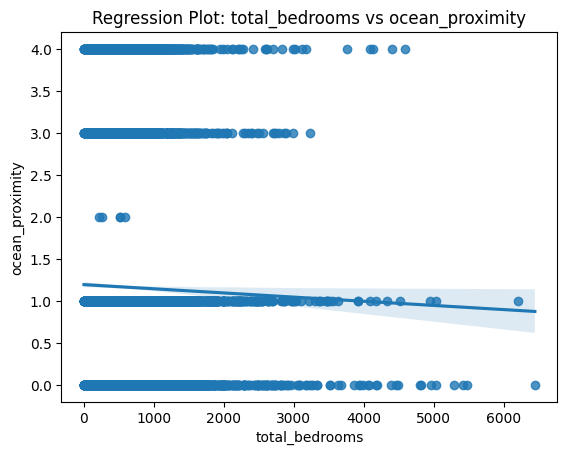

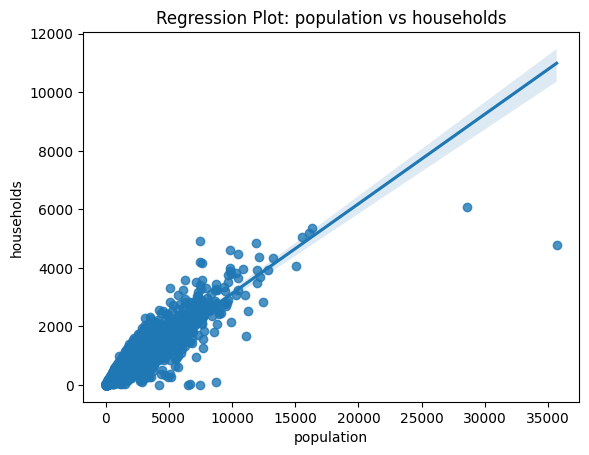

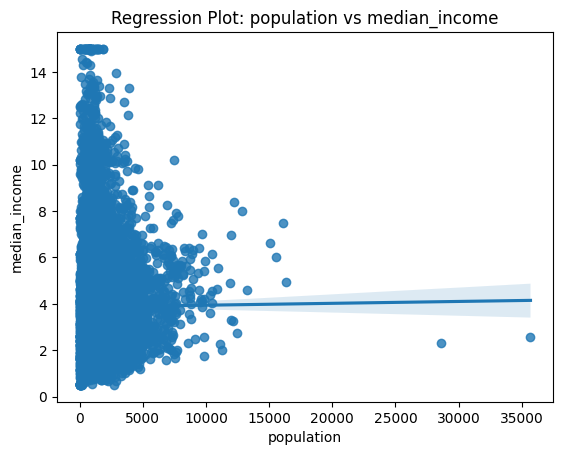

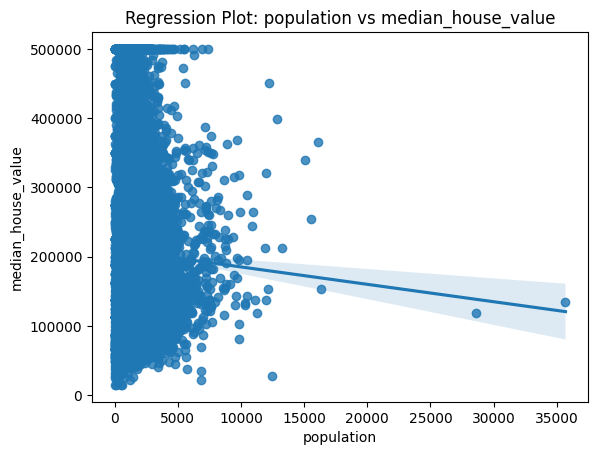

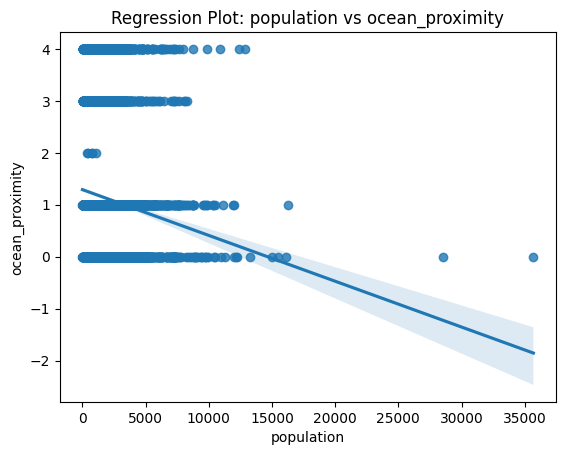

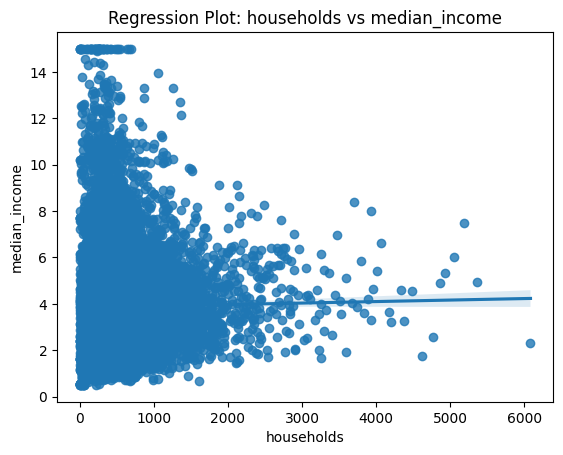

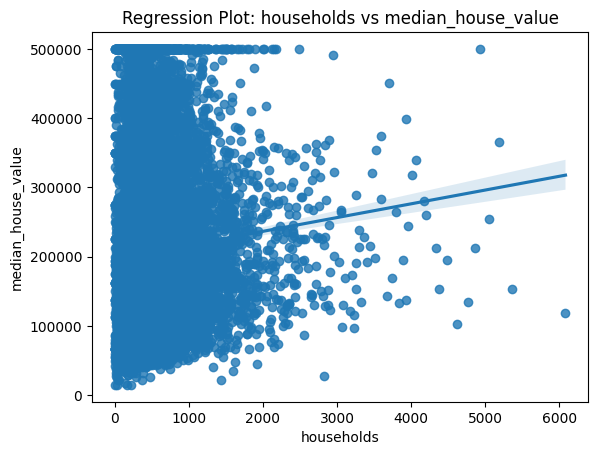

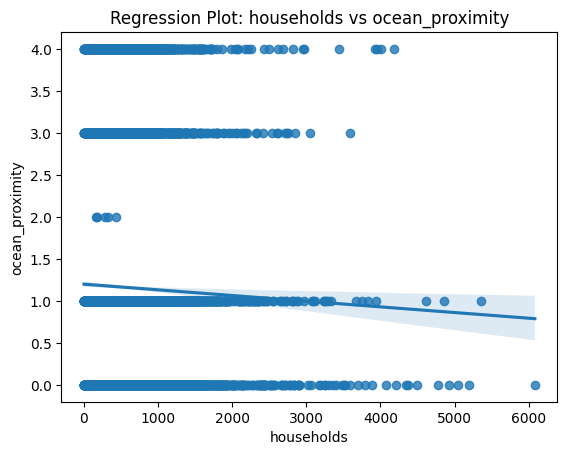

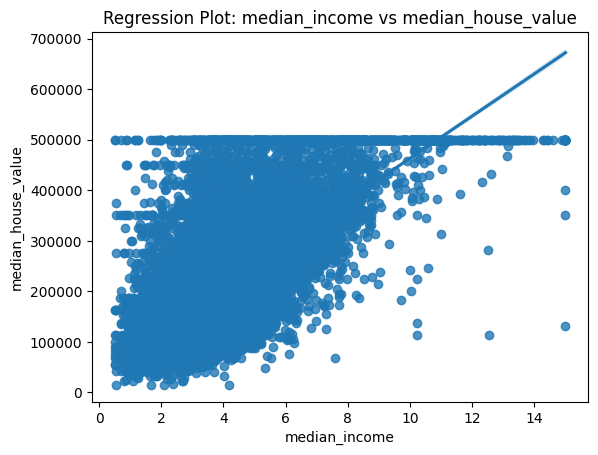

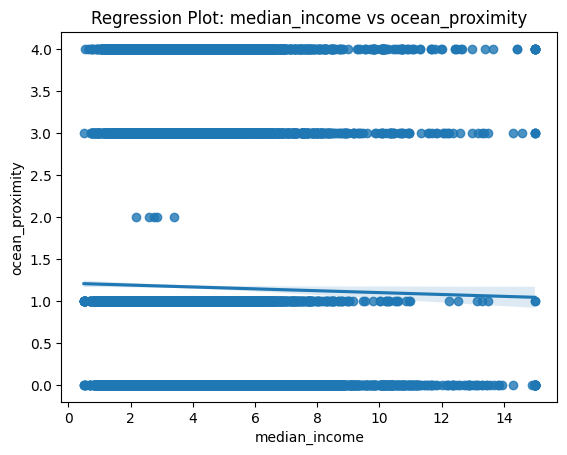

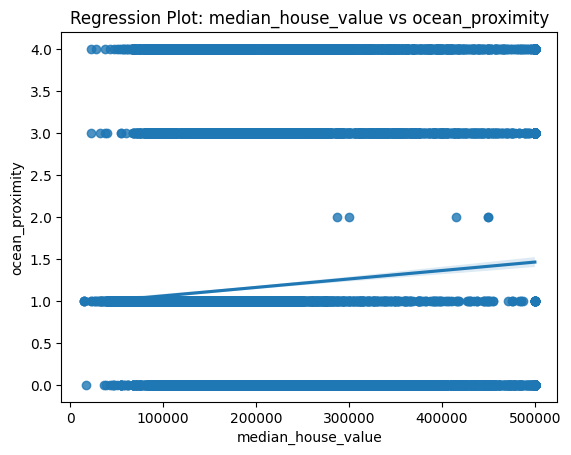

In [36]:
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        var1 = columns[i]
        var2 = columns[j]

        # Create regression plot for var1 and var2
        sns.regplot(data=df, x=var1, y=var2)
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.title("Regression Plot: {} vs {}".format(var1, var2))
        plt.show()

###### 3.3 Multivariate Analysis

###### 3.3.1 Byusing Pairplot

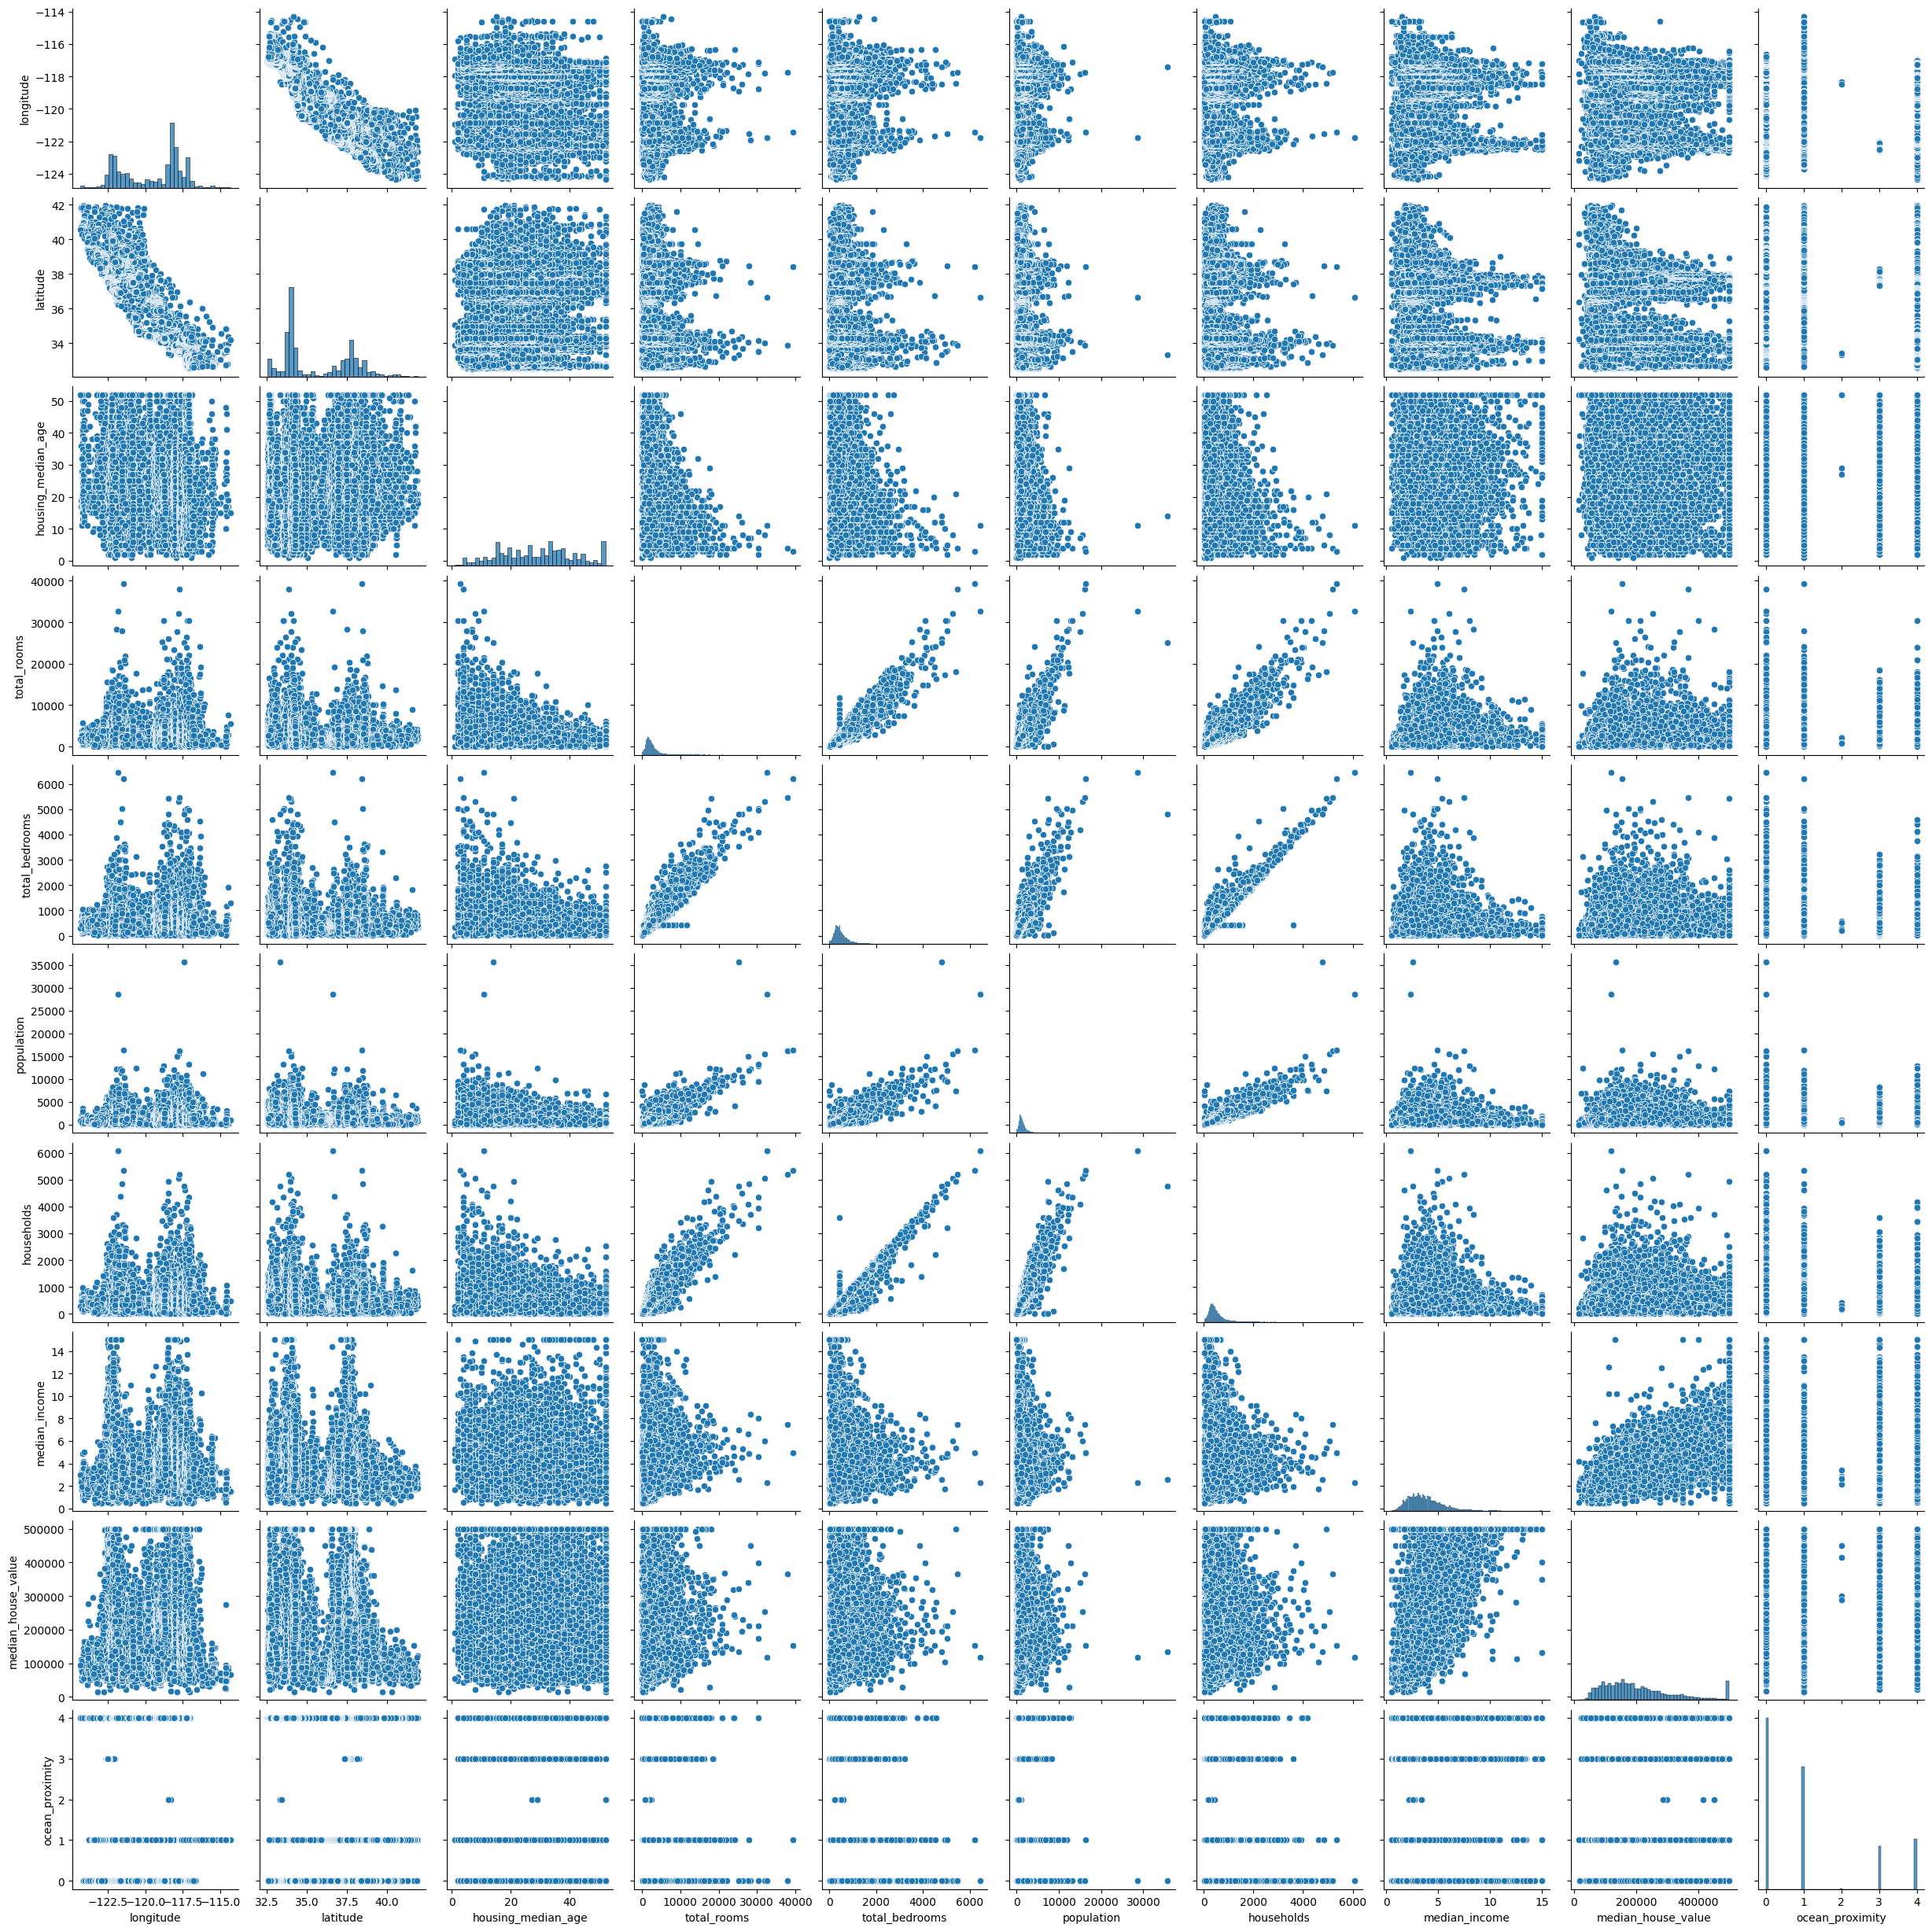

In [37]:
sns.pairplot(df)

###### 3.3.2 by using Heatmap corr function

<Axes: >

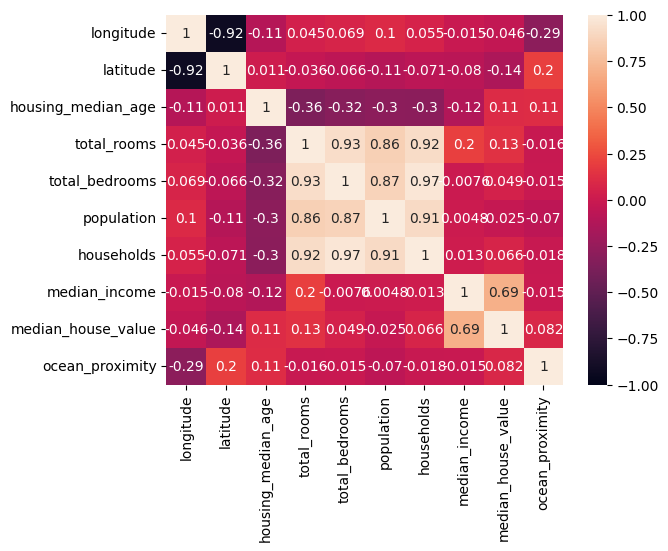

In [38]:
corr = df.select_dtypes(include=np.number).corr()
# mask = np.triu(corr)
sns.heatmap(data=corr, annot=True, vmin=-1,
    vmax=+1,)

<Axes: >

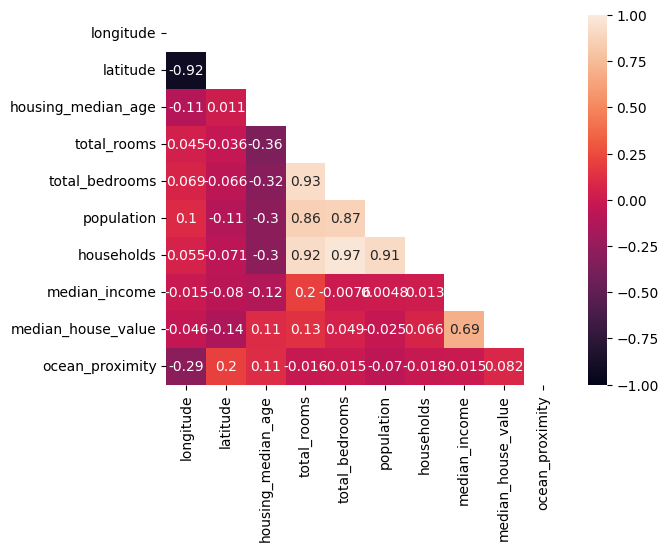

In [39]:
corr = df.select_dtypes(include=np.number).corr()
mask = np.triu(corr)
sns.heatmap(data=corr, annot=True, vmin =-1, vmax =+1,mask=mask)

In [41]:
corr['median_house_value'].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049457
households            0.065843
ocean_proximity       0.081750
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64